## 0. Setup

In [1]:
import sys
import os
sys.path.append(os.path.join('../src'))
from utils import *

import seaborn as sns
import glob
from IPython.display import SVG, display

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/Users/frederikespersenknudsen/opt/anaconda3/envs/q4b/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
# Initalizing directory for plots
plotdir = '../plots/3ldo'
os.makedirs(plotdir, exist_ok=True)

## 1. Loading trajectories

In [3]:
# Loading trajectories
mm_complex = mda.Universe('../data/3ldo/mm/system_complex.pdb', '../data/3ldo/mm/complex_l1.xtc')
mm_solvent = mda.Universe('../data/3ldo/mm/system_solvent.pdb', '../data/3ldo/mm/solvent_l1.xtc')
ml_complex = mda.Universe('../data/3ldo/ml/ru_complex_shrunk_AL12.pdb', '../data/3ldo/ml/ru_complex_shrunk_AL12.xtc')
ml_solvent = mda.Universe('../data/3ldo/ml/ru_solvent_AL12.pdb', '../data/3ldo/ml/ru_solvent_AL12.xtc')

# Renaming ligand to NKP in solvent
mm_solvent.select_atoms('resname UNL').residues[0].resname = 'NKP'
ml_solvent.select_atoms('resname UNL').residues[0].resname = 'NKP'

/Users/frederikespersenknudsen/opt/anaconda3/envs/q4b/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "


## 2. Ligand rotamer distributions

The following dihedrals are investigated:

* $N_{12}$ - $N_{8}$ - $Ru_{1}$ - $N_{23}$: First measure of Ind-Ru-Ind angle
* $N_{8}$ - $Ru_{1}$ - $N_{23}$ - $N_{27}$: Second measure of Ind-Ru-Ind angle
* $N_{12}$ - $N_{8}$ - $Ru_{1}$ - $Cl_{2}$: First measure of chlorine rotation angle
* $N_{12}$ - $N_{8}$ - $Ru_{1}$ - $Cl_{3}$: Second measure of chlorine rotation angle
* $N_{12}$ - $N_{8}$ - $Ru_{1}$ - $Cl_{4}$: Third measure of chlorine rotation angle
* $N_{12}$ - $N_{8}$ - $Ru_{1}$ - $Cl_{6}$: Fourth measure of chlorine rotation angle

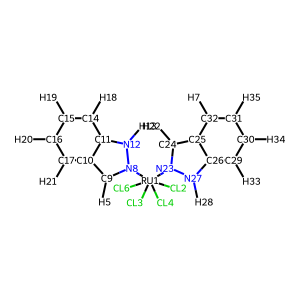

In [4]:
print_atom_names(mm_complex, 'resname NKP')

In [4]:
# Initalizing directory for ligand dihedral plots
dihdrals_plotdir = os.path.join(plotdir,'ligand_dihedrals')
os.makedirs(dihdrals_plotdir, exist_ok=True)

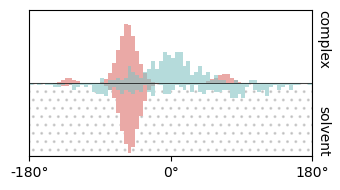

In [5]:
# Indazole #1 - Indazole #2
ind1_ind2_angle = plot_ligand_dihedral_distributions('resname NKP', ('N12','N8','N23', 'C24'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole1_indazole2.svg')

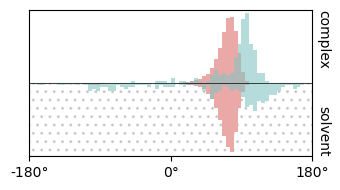

In [6]:
# Indazole #1 - Chloride #1
ind1_cl_angle = plot_ligand_dihedral_distributions('resname NKP', ('N12','N8','RU1','CL2'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole1_chloride1.svg')

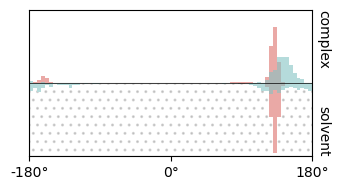

In [7]:
# Indazole #2 - Chloride #1
ind2_cl_angle = plot_ligand_dihedral_distributions('resname NKP', ('C24','N23','RU1','CL2'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole2_chloride1.svg')

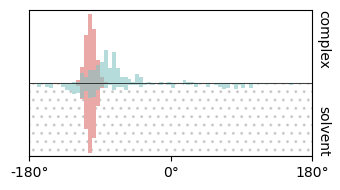

In [27]:
# Indazole #1 - Chloride #2
_ = plot_ligand_dihedral_distributions('resname NKP', ('N12','N8','RU1','CL3'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole1_chloride2.svg')

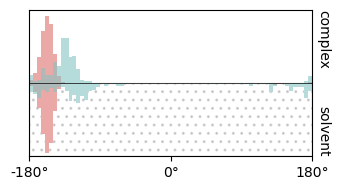

In [29]:
# Indazole #1 - Chloride #3
_ = plot_ligand_dihedral_distributions('resname NKP', ('N12','N8','RU1','CL4'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole1_chloride3.svg')

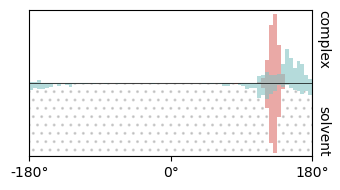

In [28]:
# Indazole #1 - Chloride #4
_ = plot_ligand_dihedral_distributions('resname NKP', ('N12','N8','RU1','CL6'),
                                       mm_complex, mm_solvent, ml_complex, ml_solvent,
                                       atom_name_scheme='complex',
                                       save_to=dihdrals_plotdir+'/dihedral_indazole1_chloride4.svg')

##### Manual plotting

In [26]:
dihedrals_mm_complex = ind1_cl_angle['mm_complex'] - ind2_cl_angle['mm_complex']
dihedrals_ml_complex = ind1_cl_angle['ml_complex'] - ind2_cl_angle['ml_complex']
dihedrals_mm_solvent = ind1_cl_angle['mm_solvent'] - ind2_cl_angle['mm_solvent']
dihedrals_ml_solvent = ind1_cl_angle['ml_solvent'] - ind2_cl_angle['ml_solvent']

bins = bins = np.linspace(-180, 180, int(360 / 5 + 1))
bins_mid = (bins[1:] + bins[:-1]) / 2
alpha = 0.6
binsize = 5

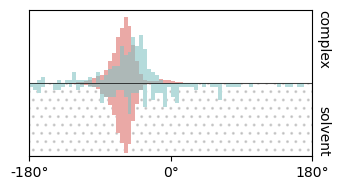

In [27]:
# Calculating densities
density_mm_complex = np.histogram(dihedrals_mm_complex, bins=bins, density=True)[0]
density_mm_solvent = np.histogram(dihedrals_mm_solvent, bins=bins, density=True)[0]
density_ml_complex = np.histogram(dihedrals_ml_complex, bins=bins, density=True)[0]
density_ml_solvent = np.histogram(dihedrals_ml_solvent, bins=bins, density=True)[0]

# Initializing figure
fig = plt.figure(figsize=(3.5, 2))
ax = plt.gca()

# Setting axis limits
plt.xlim(-180, 180)
ymax = max([
    max(density_mm_complex),
    max(density_mm_solvent),
    max(density_ml_complex),
    max(density_ml_solvent)]
) * 1.05
plt.ylim(-ymax, ymax)

# Complex-solvent interface
plt.hlines(0, xmin=-180, xmax=180,
            linewidth=0.5, color='black')
ax.add_patch(Rectangle((-180, 0), 360, -ymax,
                        fill=False, color='grey', hatch='..', alpha=0.3))
plt.text(185, ymax, "complex",
            rotation=-90, fontsize=10, va='top')
plt.text(185, -ymax, "solvent",
            rotation=-90, fontsize=10, va='bottom')

# Cover up patterned background patch up with full alpha white histograms
plt.bar(bins_mid, density_mm_complex,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, density_ml_complex,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, -density_mm_solvent,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, -density_ml_solvent,
        alpha=1, color='white', width=binsize)

# Histograms; Complex on top, solvent on bottom; MM in red, ML in blue
plt.bar(bins_mid, density_mm_complex,
        alpha=alpha, color=palette['red'], width=binsize)
plt.bar(bins_mid, density_ml_complex,
        alpha=alpha, color=palette['mint'], width=binsize)
plt.bar(bins_mid, -density_mm_solvent,
        alpha=alpha, color=palette['red'], width=binsize)
plt.bar(bins_mid, -density_ml_solvent, alpha=alpha,
        color=palette['mint'], width=5)

# Formatting axes
ax.axes.get_xaxis().set_major_formatter(tck.FormatStrFormatter('%g°'))
ax.axes.get_xaxis().set_major_locator(tck.MultipleLocator(base=180))
ax.axes.get_yaxis().set_visible(False)

plt.tight_layout()

## 3. Protein-ligand distance distributions

Based mostly on the average distance analysis and structural reasonninng, somewhat in agreement with interaction fingerprinting analysis, these candidates for protein-ligand probes are proposed:

- Acid group ($O_{1}$, $O_{2}$, $C_{12}$): ARG263
- 5-ring of benzothiopene ($C_{AV}$, $C_{AW}$, $C_{AX}$, $C_{AY}$, $S$): VAL253, THR266
- 6-ring of benzothiopene ($C_{AY}$, $C_{AI}$, $C_{AH}$, $C_{AG}$, $C_{AF}$): PHE228, MET231, PHE270
- Linker ($C_{AN}$, $C_{AL}$, $C_{AM}$, $O_{AO}$): LEU246, PHE254, LEU267
- Phenyl ($C_{AT}$, $C_{AK}$, $C_{AS}$, $C_{AU}$, $C_{AR}$, $C_{AJ}$): LEU246, MET250, PHE270
- Chloride ($Cl$): LEU235, LEU246, PHE270, VAL274, LEU290

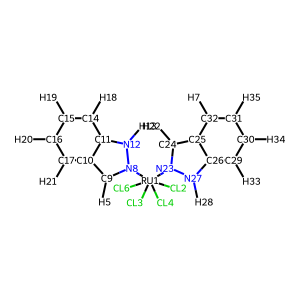

In [30]:
print_atom_names(mm_complex, 'resname NKP')

In [10]:
# Initalizing directory for distance probe plots
distance_plotdir = os.path.join(plotdir, 'distance_probes')
os.makedirs(distance_plotdir, exist_ok=True)

### 3.1 Mean distance matrices

100%|██████████| 10001/10001 [00:30<00:00, 328.38it/s]


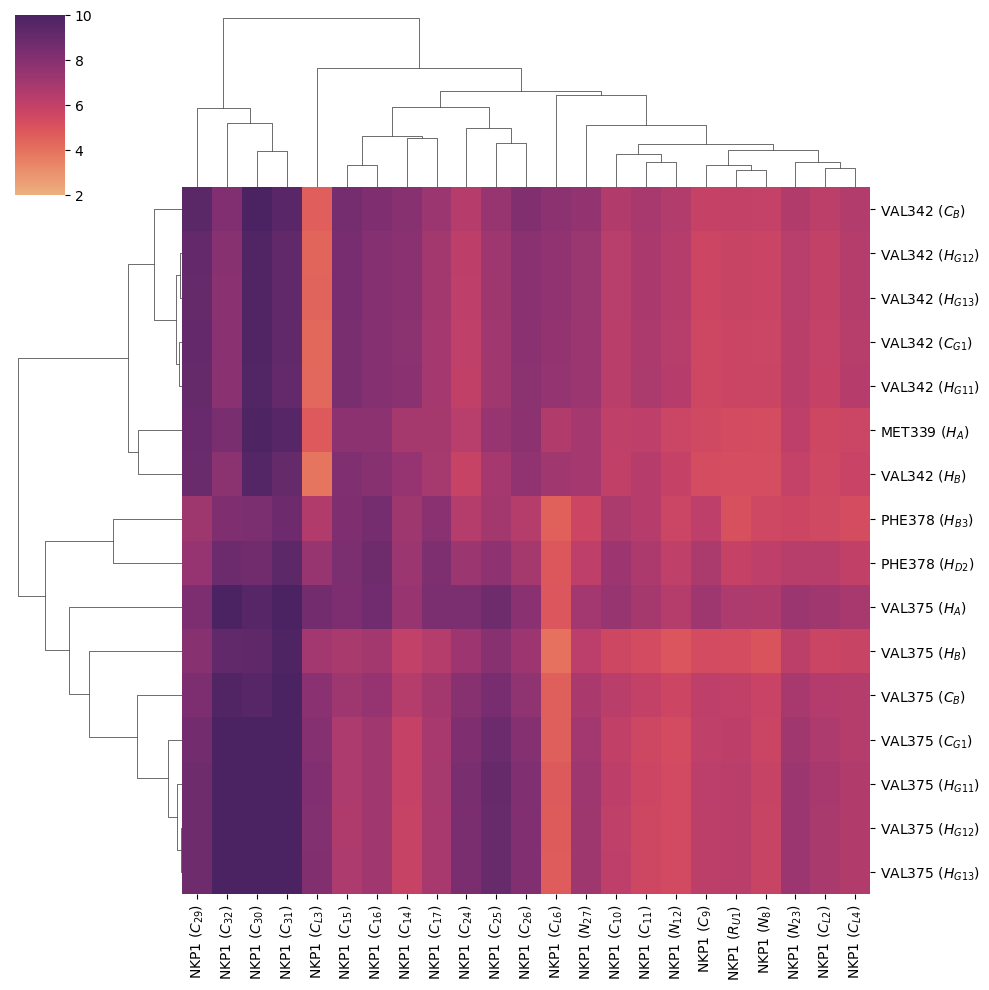

In [32]:
mm_dists = plot_distance_matrix(mm_complex,
                                "resname NKP and not element H",
                                "protein and around 5 resname NKP",
                                measure='mean', sel2_cutoff=5,
                                save_to=os.path.join(distance_plotdir, "heatmap_mm_protein_around_5_ligand_mean.svg"))

100%|██████████| 149/149 [00:00<00:00, 338.52it/s]


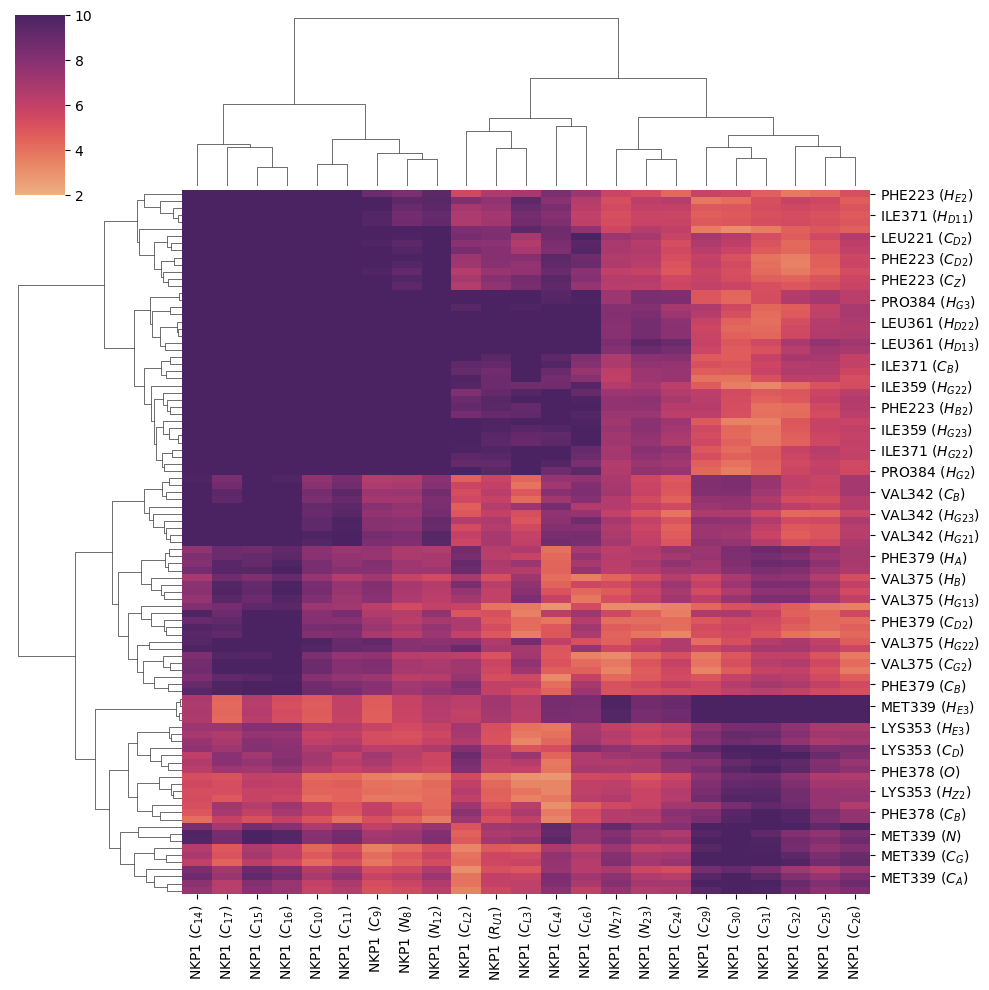

In [33]:
ml_dists = plot_distance_matrix(ml_complex,
                                "resname NKP and not element H",
                                "protein and around 5 resname NKP",
                                measure='mean', sel2_cutoff=5,
                                save_to=os.path.join(distance_plotdir, "heatmap_ml_protein_around_5_ligand_mean.svg"))

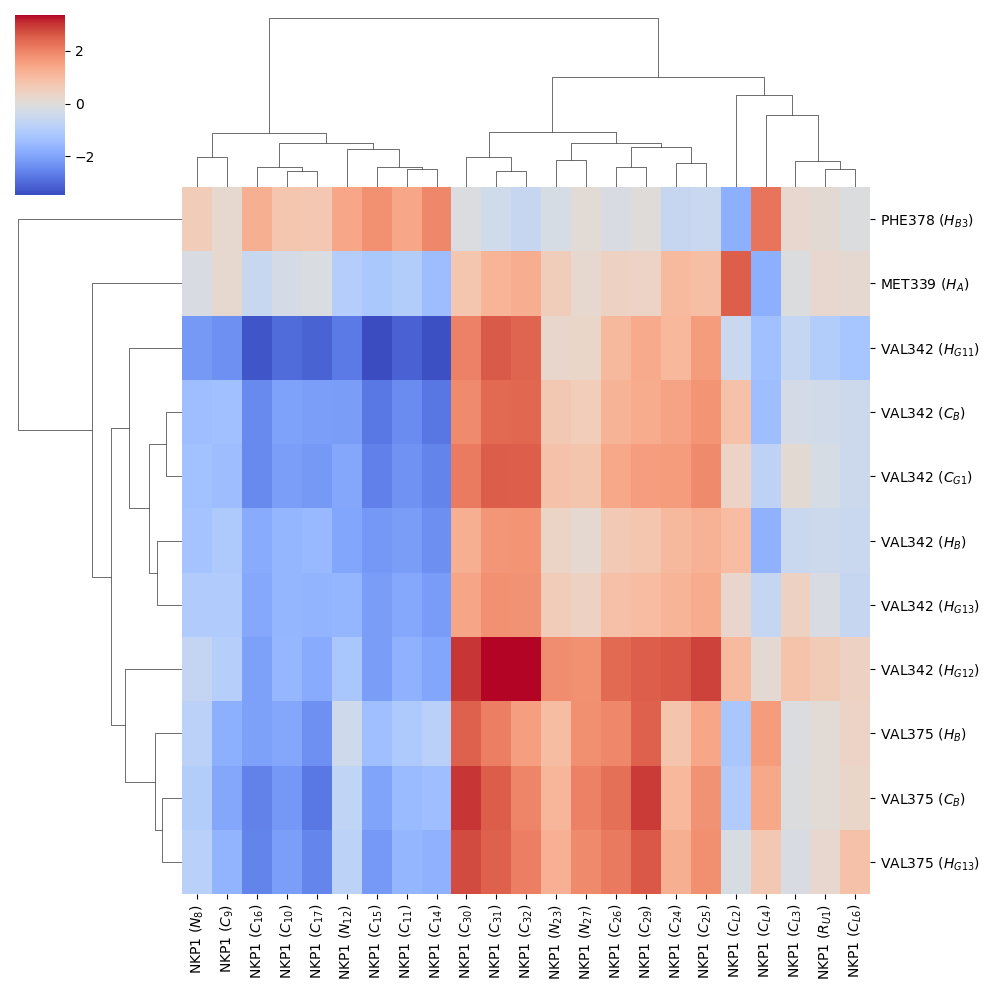

In [34]:
# Difference between MM and ML
sns.clustermap((mm_dists - ml_dists).dropna(), cmap="coolwarm")
# Red  = ML distance shorter than MM
# Blue = ML distance longer  than MM

### 3.2 Probe exploration

!TODO: Update
Based mostly on the average distance analysis and structural reasoning. these candidates for protein-ligand probes are proposed:

- Chlorines ($Cl_{2}$, $Cl_{3}$, $Cl_{4}$, $Cl_{6}$): Met339, Val342, Val375, Phe378
- Ruthenium ($Ru_{1}$): Met339, Val342, Val375, Phe378
- Indazole #1 (Buried) ($C_{9}$, $C_{10}$, $C_{11}$, $C_{14}$, $C_{15}$, $C_{16}$, $C_{17}$, $N_{8}$, $N_{12}$): Phe223, Ile359, Ile371, Val375
- Indazole #2 (Exposed) ($C_{24}$, $C_{25}$, $C_{26}$, $C_{29}$, $C_{30}$, $C_{31}$, $C_{32}$, $N_{23}$, $N_{27}$): Val342, Val375, Phe378

In [7]:
# Setting probe candidates
distance_probes = {
    'chlorines':
        {'ligand_query': 'resname NKP and name CL2 CL3 CL4 CL6',
         'residues': ['MET339', 'VAL342', 'VAL375', 'PHE378', 'PHE379']},
    'ruthenium':
        {'ligand_query': 'resname NKP and name RU1',
         'residues': ['MET339', 'VAL342', 'VAL375', 'PHE378', 'PHE379']},
    'indazole1':
        {'ligand_query': 'resname NKP and name C9 C10 C11 C14 C15 C16 C17 N8 N12',
         'residues': ['ILE359','LEU361', 'VAL375', 'PHE379', 'PRO384']},
    'indazole2':
        {'ligand_query': 'resname NKP and name C24 C25 C26 C29 C30 C31 C32 N23 N27',
         'residues': ['MET339', 'VAL342', 'PHE378', 'PHE379']}
}

chlorines
	 MET339
	 VAL342
	 VAL375
	 PHE378
	 PHE379
ruthenium
	 MET339
	 VAL342
	 VAL375
	 PHE378
	 PHE379


100%|██████████| 149/149 [00:00<00:00, 279.77it/s]
/Users/frederikespersenknudsen/Local/Big storage/KLL/mm_ml_analysis/notebooks/../src/utils.py:526: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
100%|██████████| 149/149 [00:00<00:00, 403.31it/s]
/Users/frederikespersenknudsen/Local/Big storage/KLL/mm_ml_analysis/notebooks/../src/utils.py:455: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


indazole1
	 ILE359
	 LEU361


100%|██████████| 149/149 [00:00<00:00, 374.65it/s]


	 VAL375
	 PHE379


100%|██████████| 149/149 [00:00<00:00, 327.39it/s]


	 PRO384


100%|██████████| 149/149 [00:00<00:00, 361.53it/s]


indazole2
	 MET339
	 VAL342
	 PHE378
	 PHE379


100%|██████████| 149/149 [00:00<00:00, 338.40it/s]


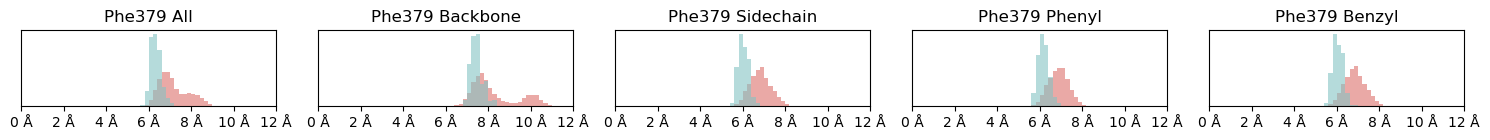

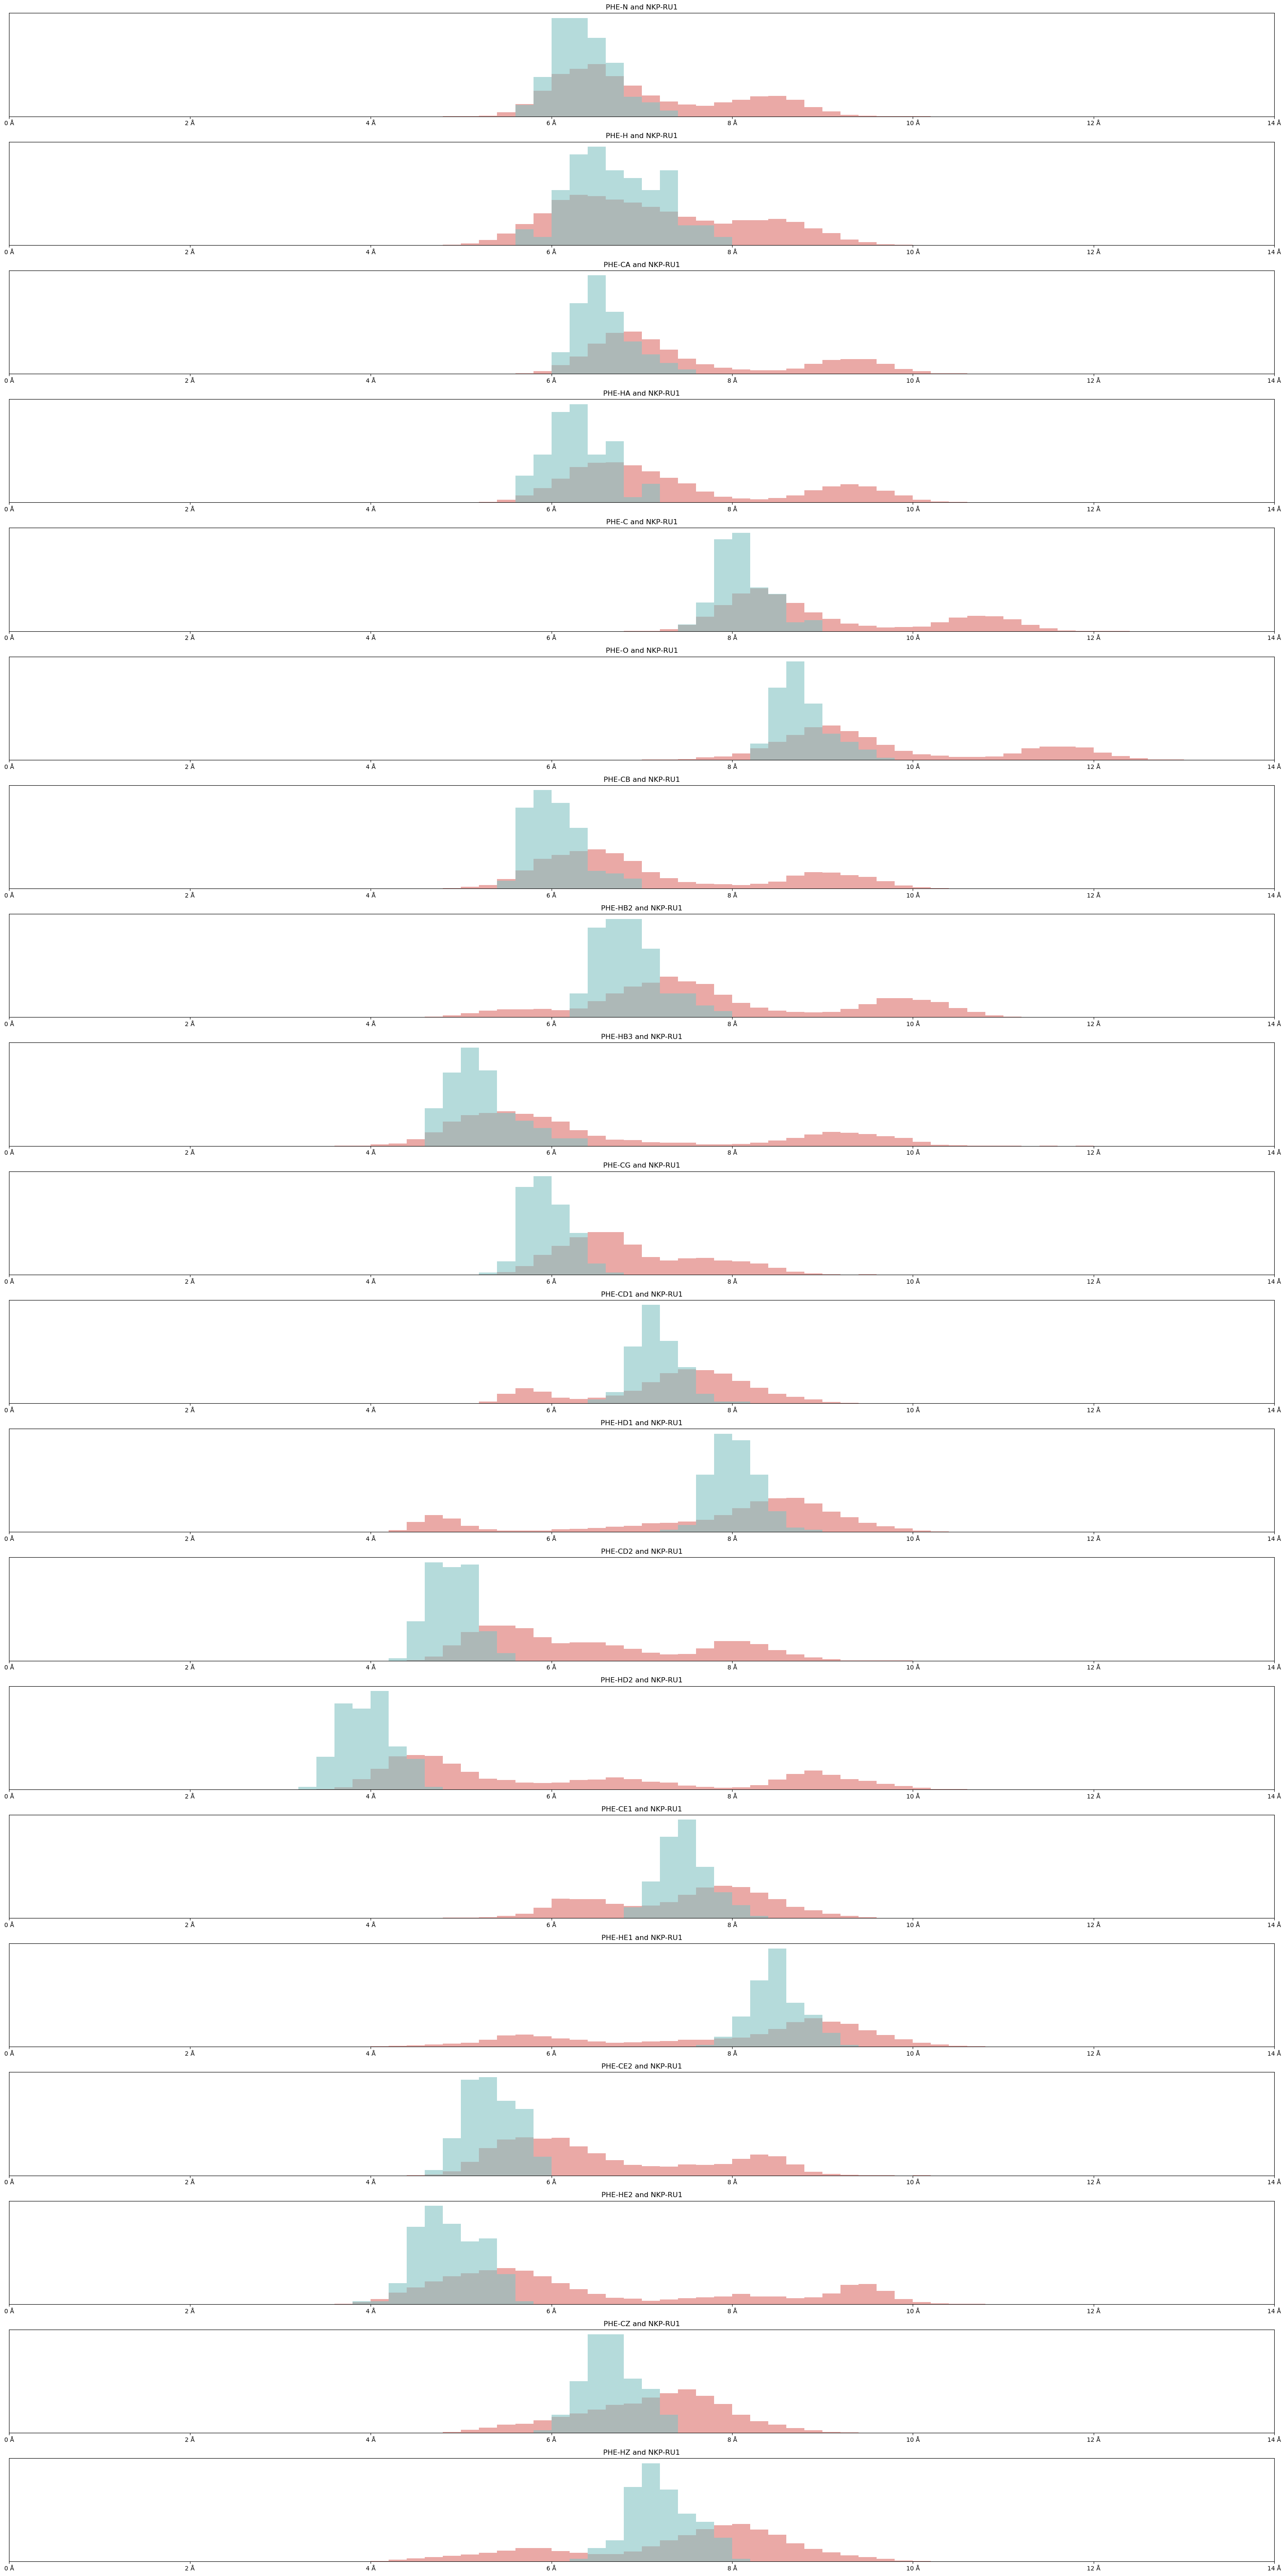

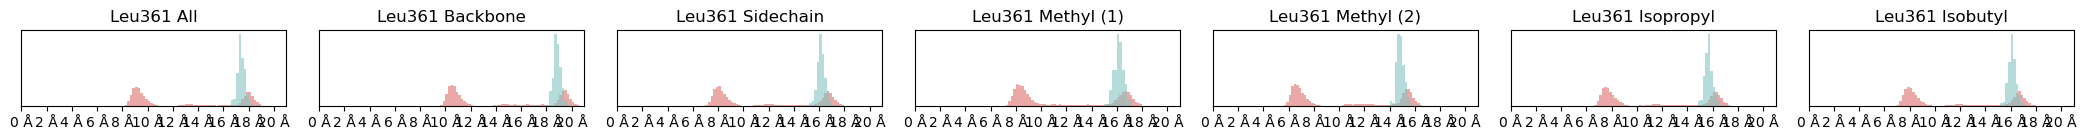

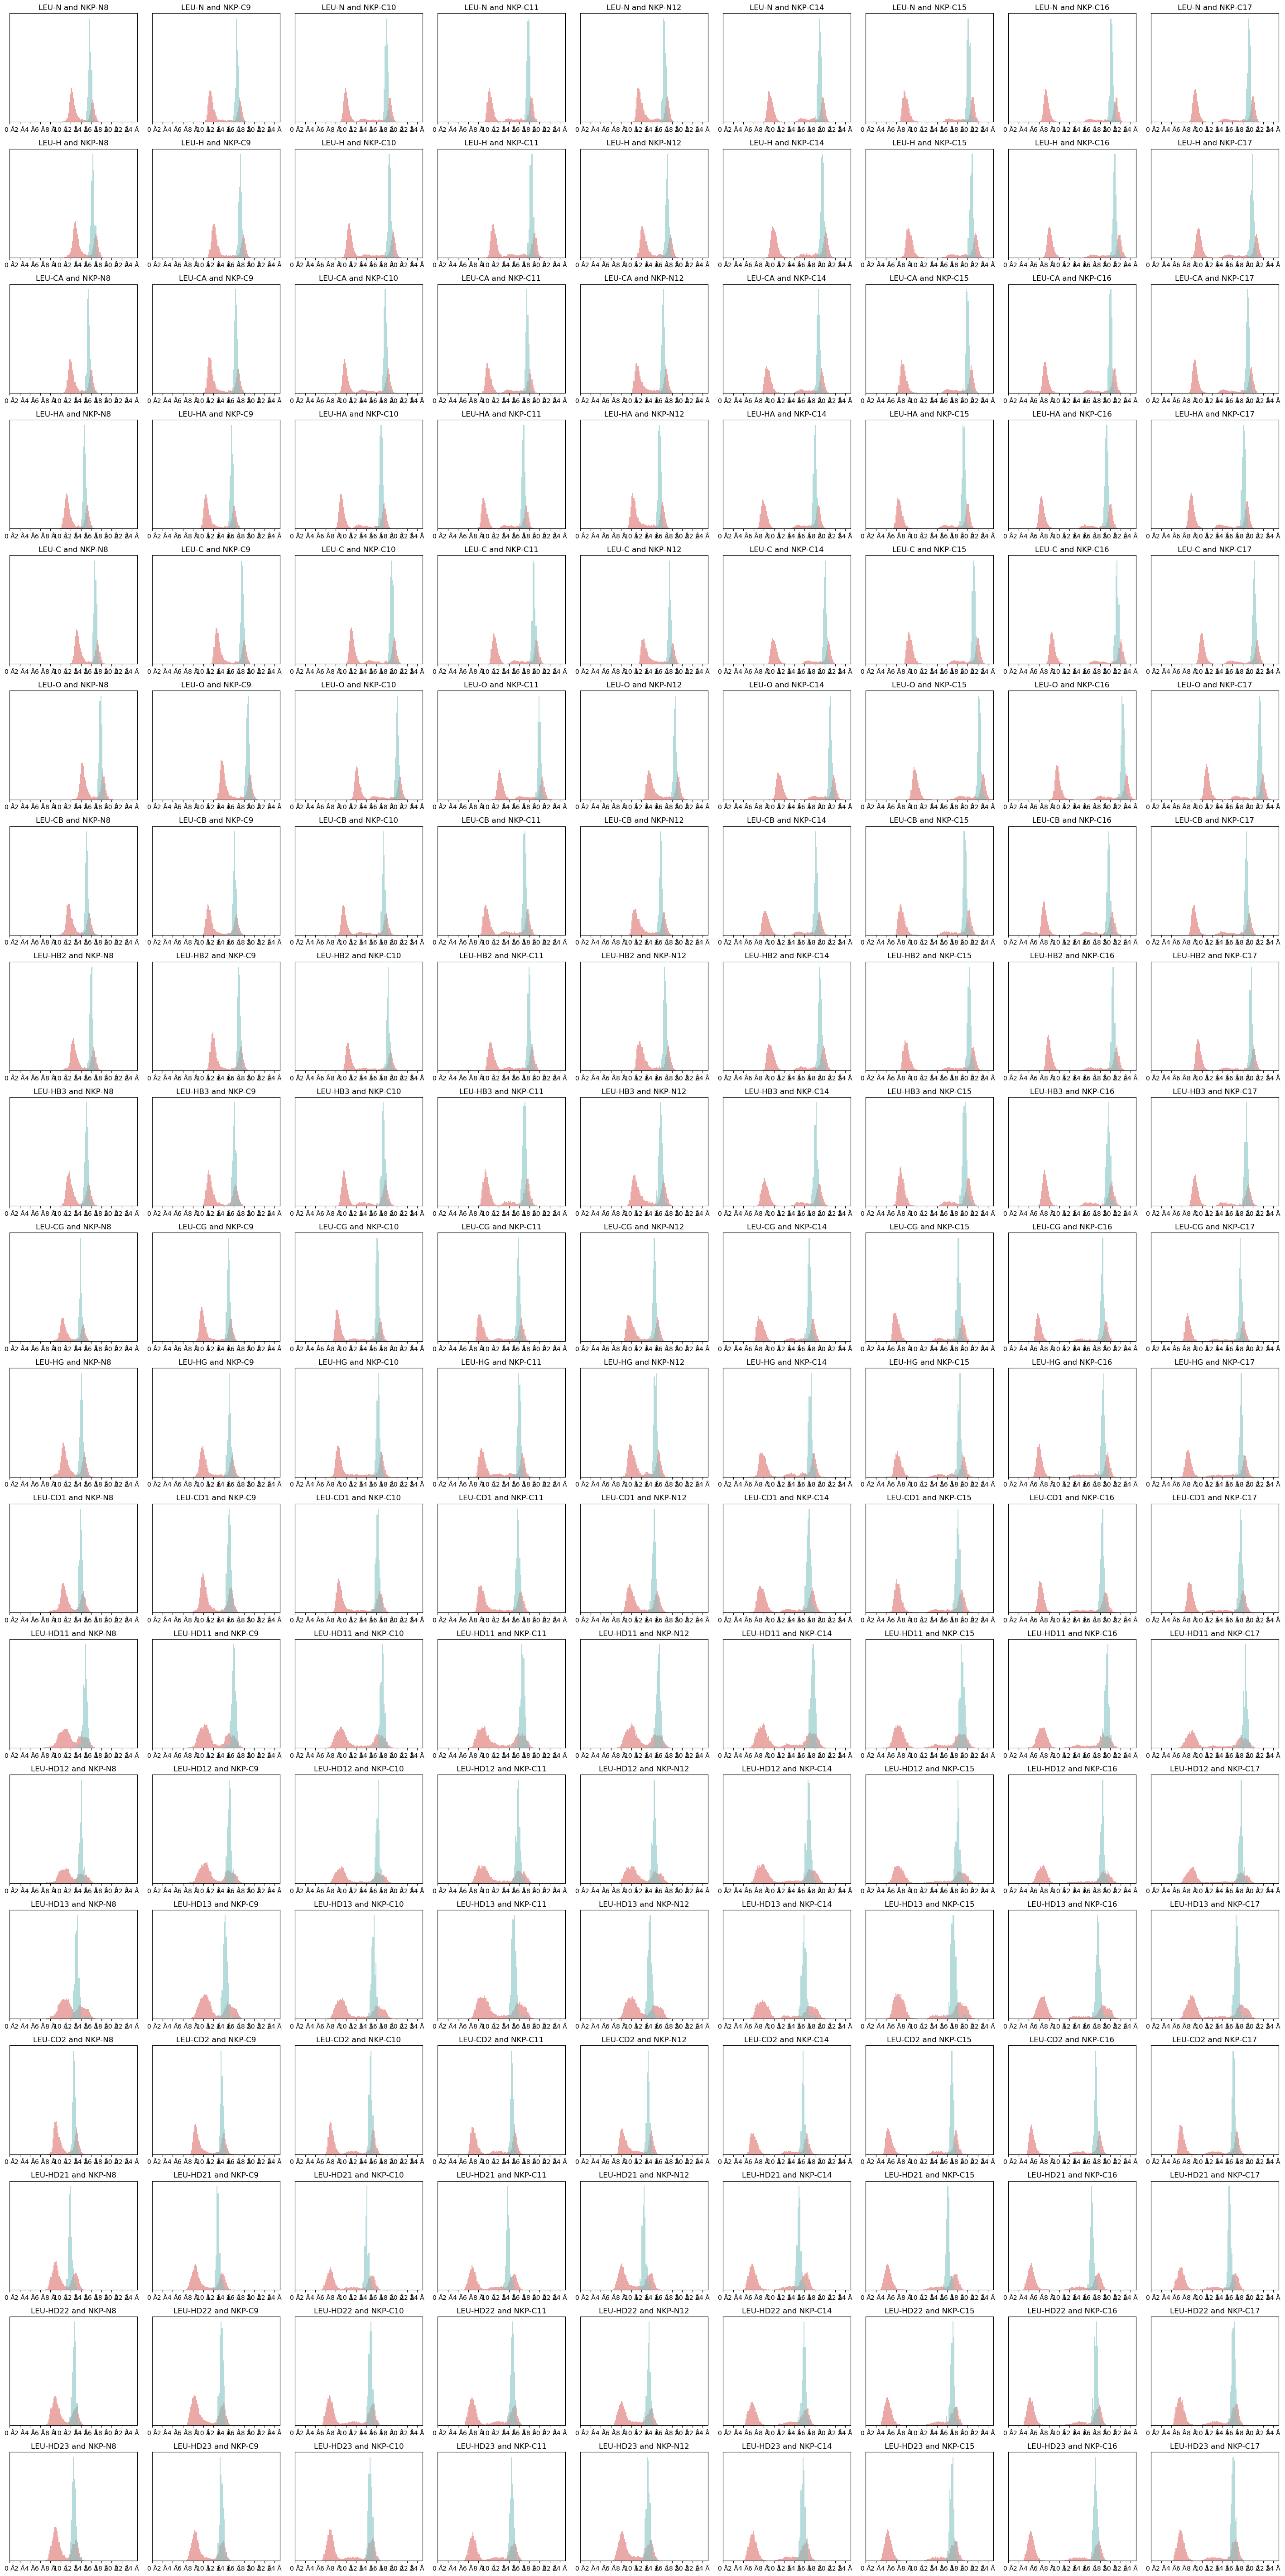

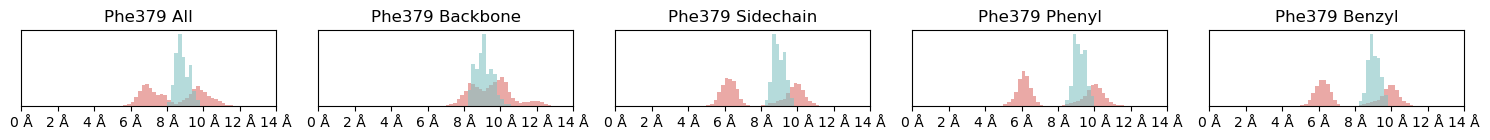

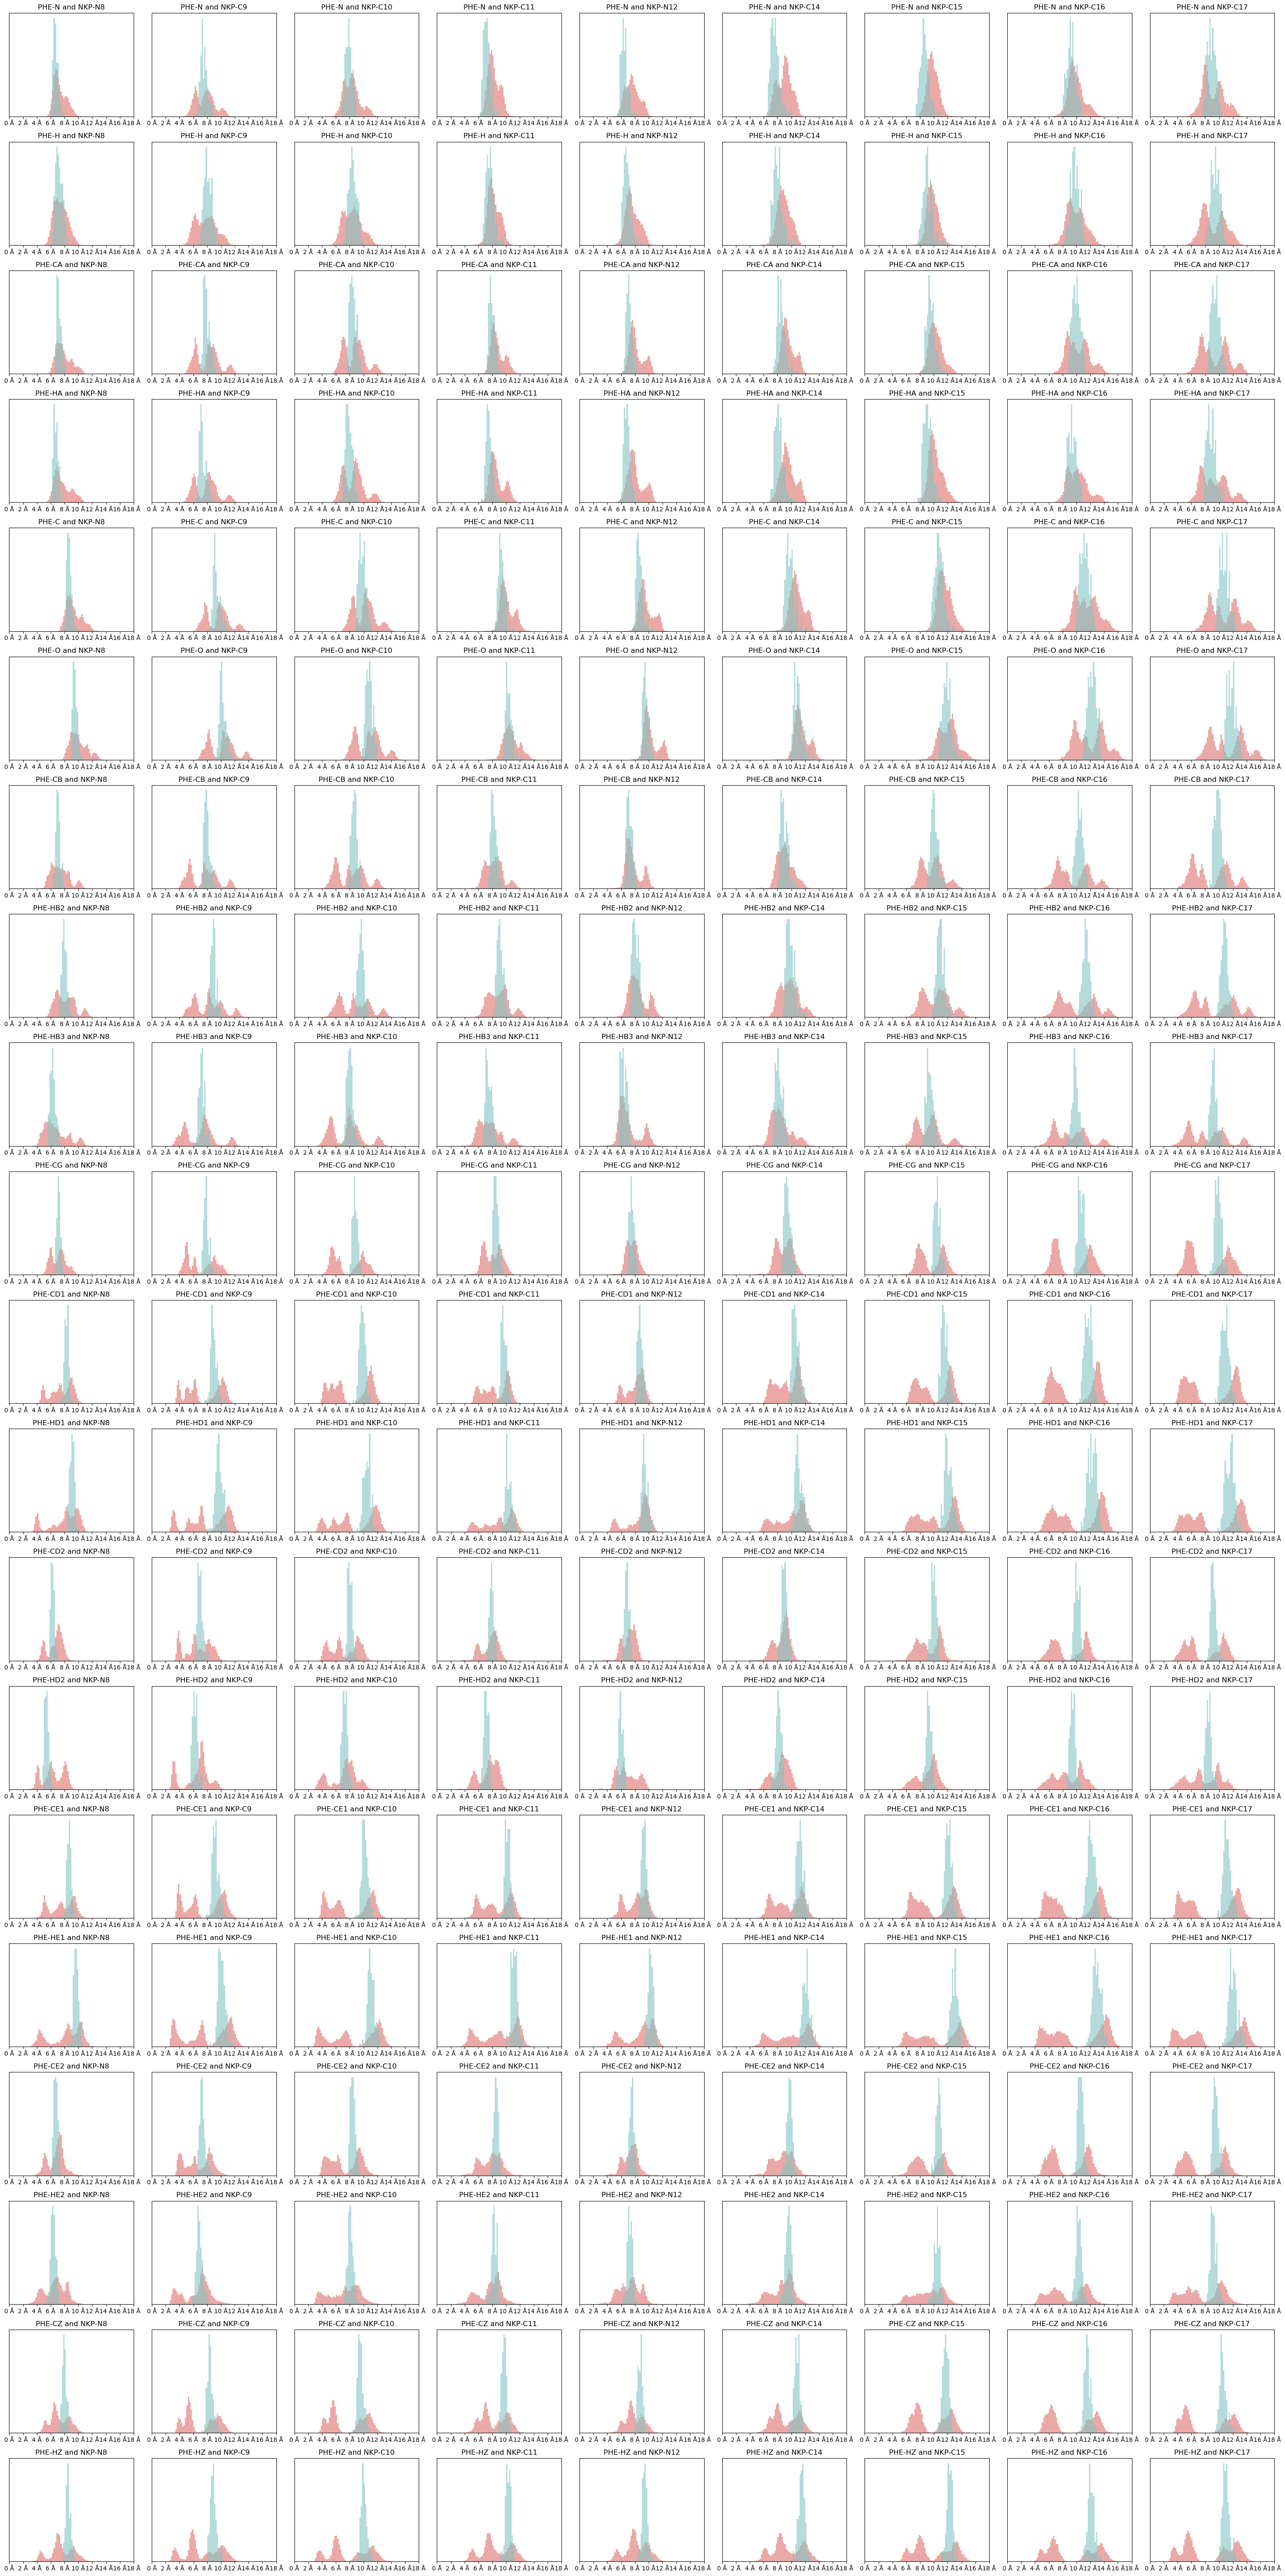

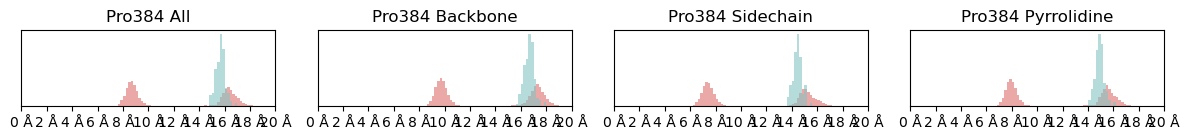

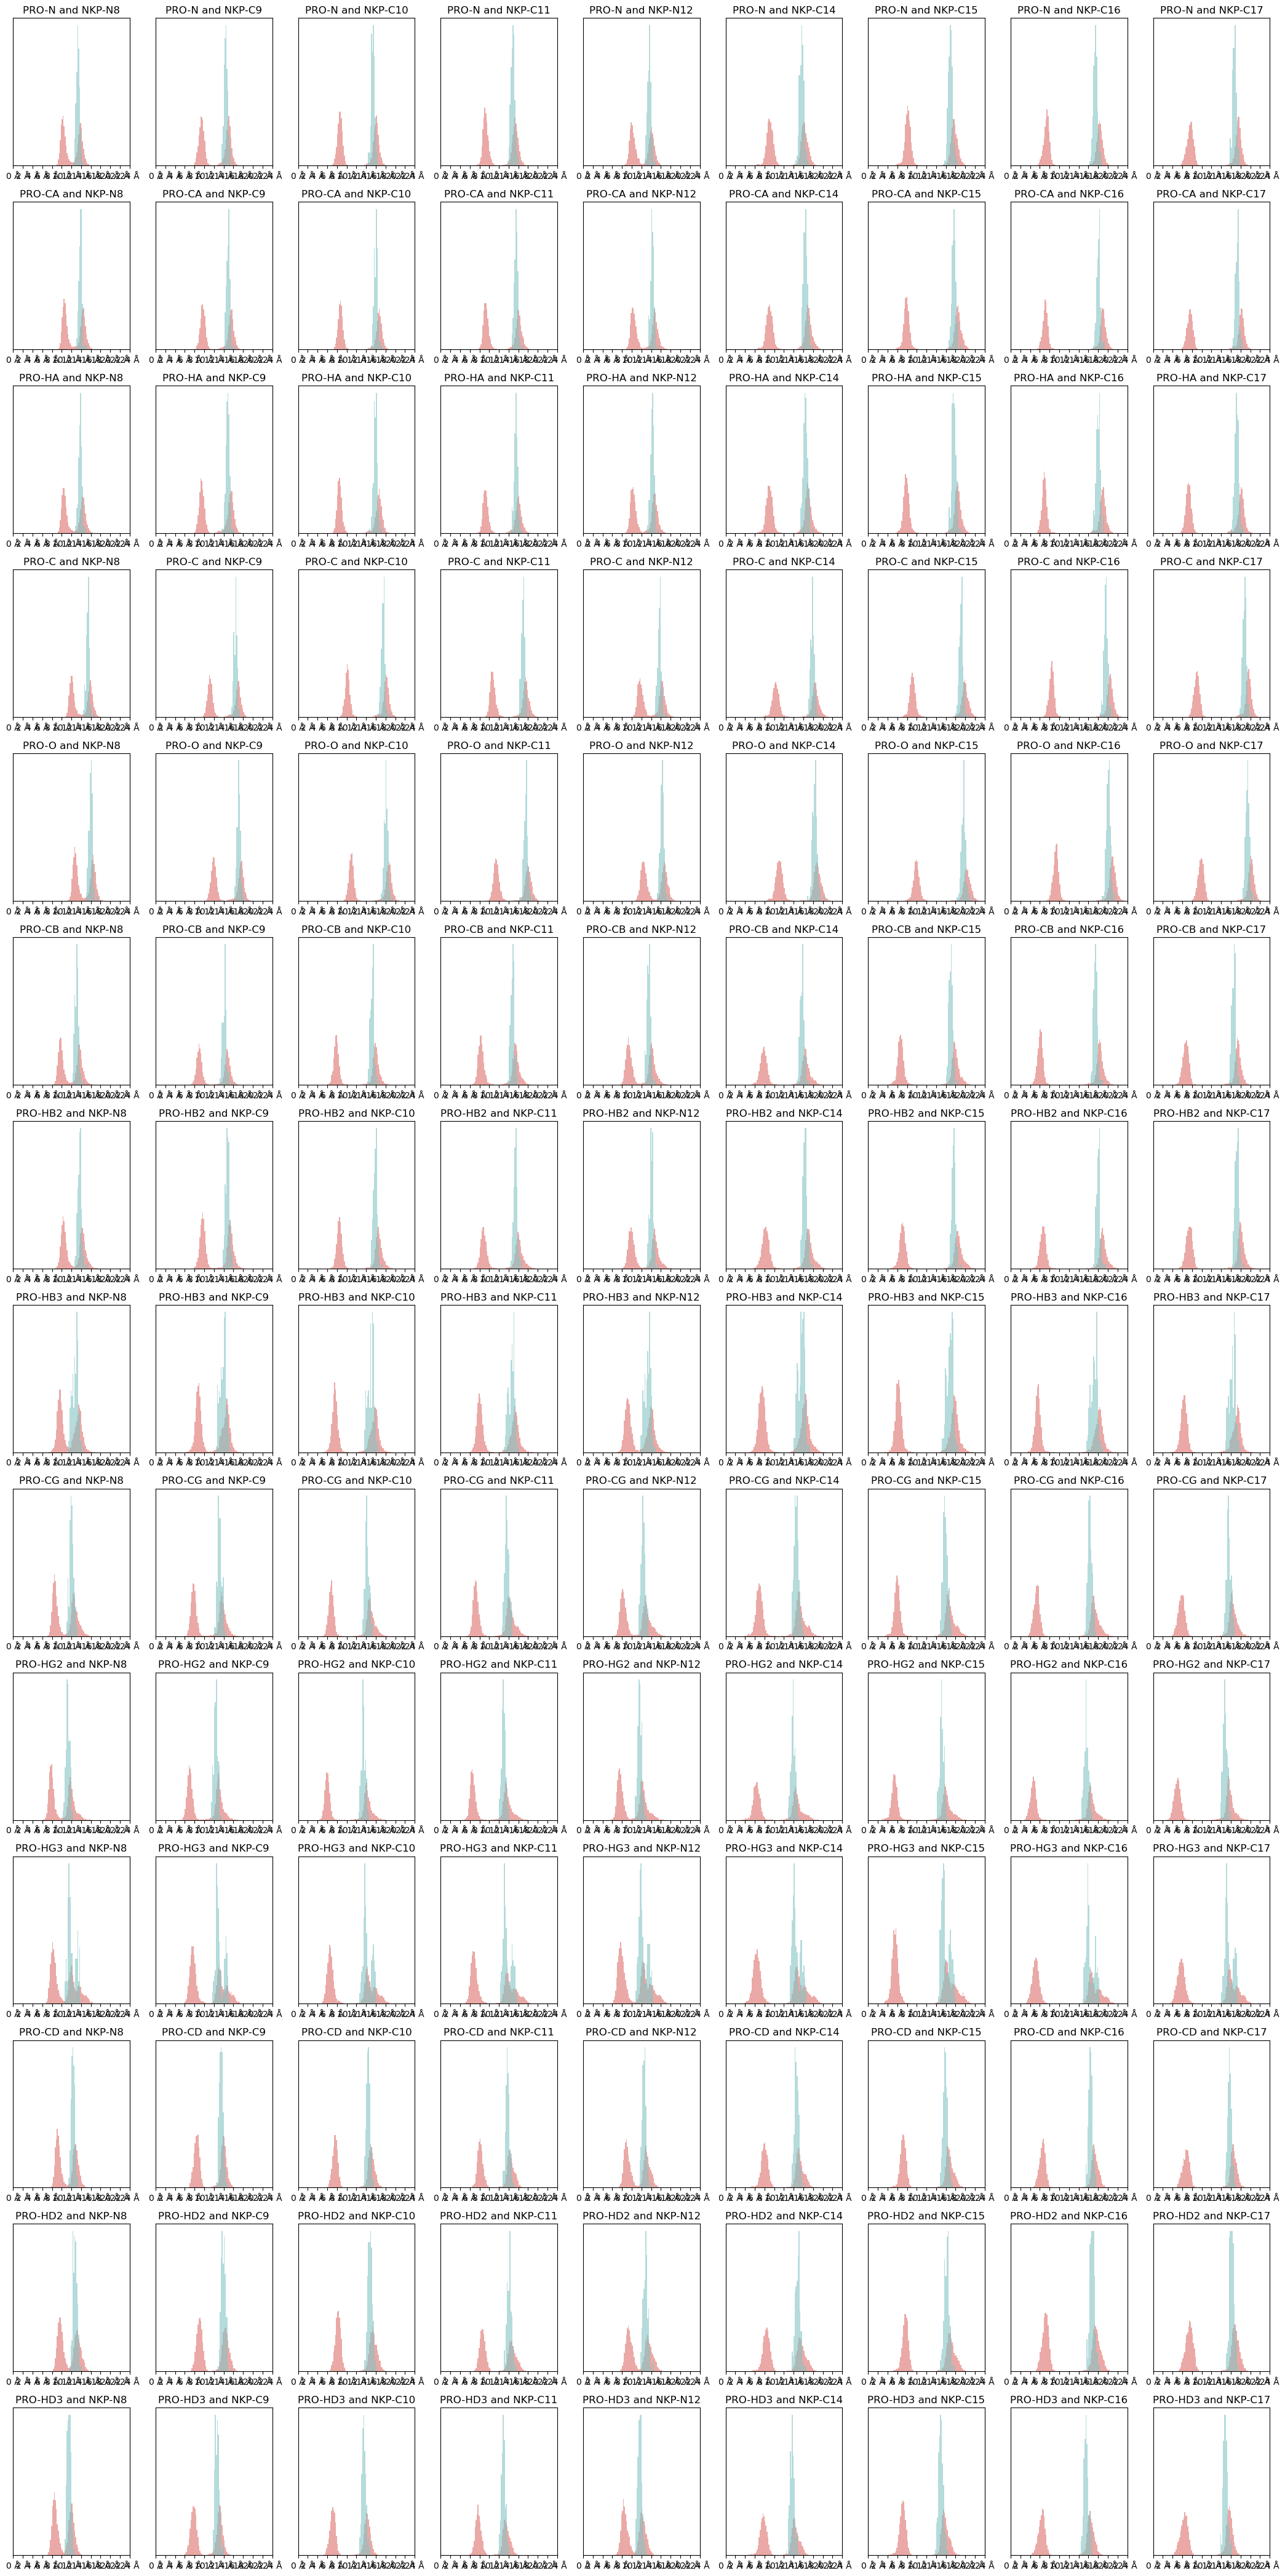

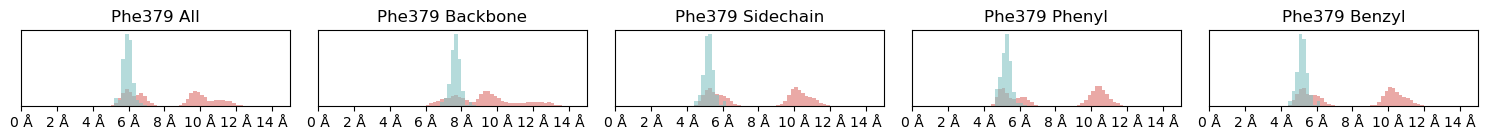

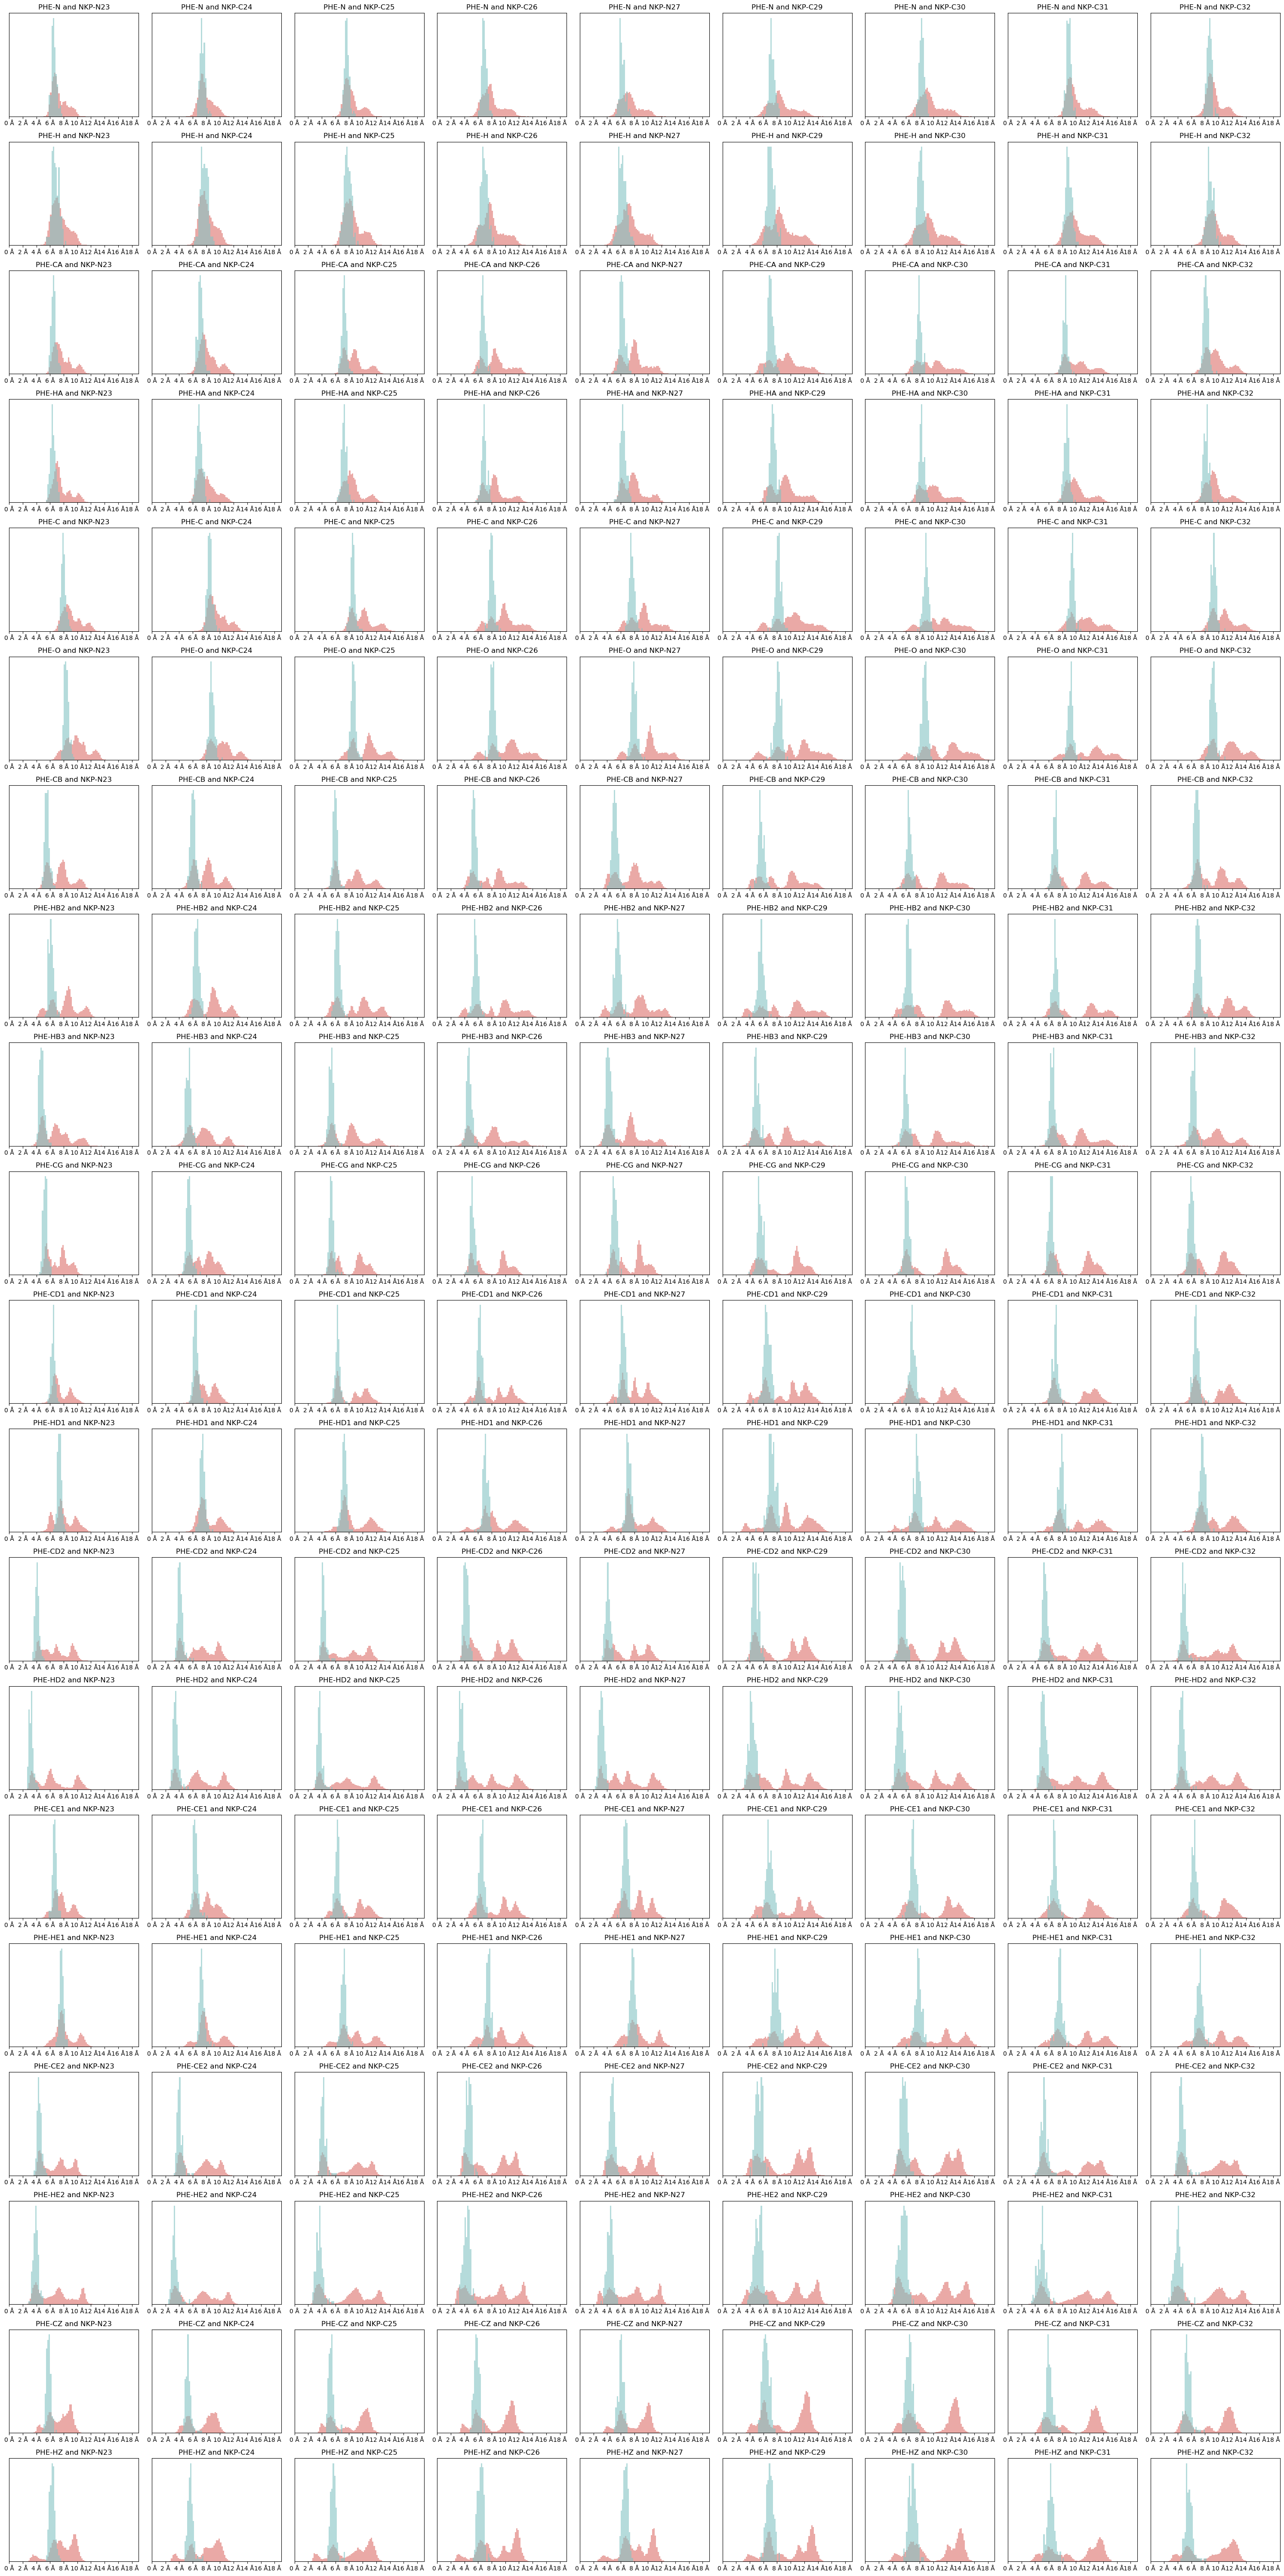

In [7]:
# Candidate probe distance distributions for substrctures and single atoms
replot = False

# Looping over all probes
for ligand_substructure in distance_probes:
    print(ligand_substructure)

    for residue in distance_probes[ligand_substructure]['residues']:
        print('\t', residue)

        # Creating directory for plots
        probe_plotdir = os.path.join(distance_plotdir, 'ligand_'+ligand_substructure, residue.lower())
        os.makedirs(probe_plotdir, exist_ok=True)

        # Plotting residue # Plotting residue substructure probes
        if f'substructure_distances_{ligand_substructure}_{residue.lower()}.svg' not in os.listdir(probe_plotdir) or replot:
            plot_residue_substructure_com_distance_distributions(
                mm_complex,
                ml_complex,
                'protein and resid ' + residue[3:].lower(),
                distance_probes[ligand_substructure]['ligand_query'],
                save_to=os.path.join(probe_plotdir, f'substructure_distances_{ligand_substructure}_{residue.lower()}.svg')
            )

        # Plotting single atom probes
        if f'single_atom_distances_{ligand_substructure}_{residue.lower()}.svg' not in os.listdir(probe_plotdir) or replot:
            plot_single_atom_distance_distributions(
                mm_complex,
                ml_complex,
                'protein and resid ' + residue[3:].lower(),
                distance_probes[ligand_substructure]['ligand_query'],
                save_to=os.path.join(probe_plotdir, f'single_atom_distances_{ligand_substructure}_{residue.lower()}.svg')
            )

CHLORINES


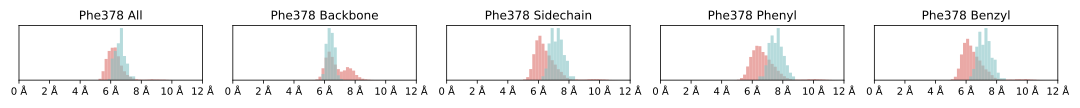

CHLORINES


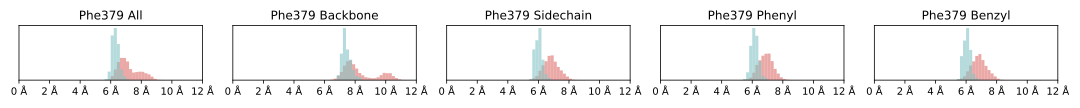

CHLORINES


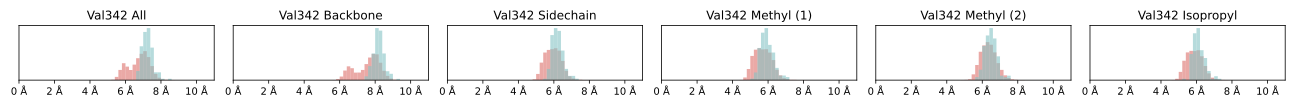

CHLORINES


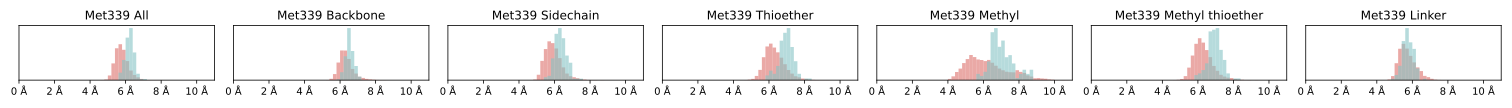

CHLORINES


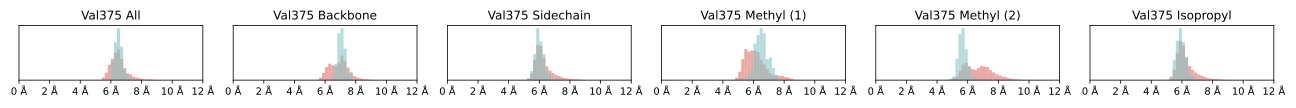

INDAZOLE2


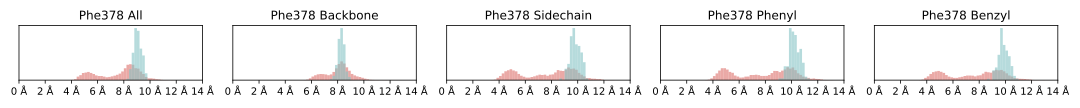

INDAZOLE2


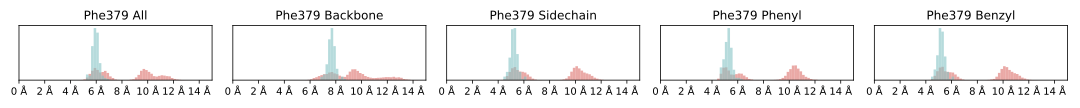

INDAZOLE2


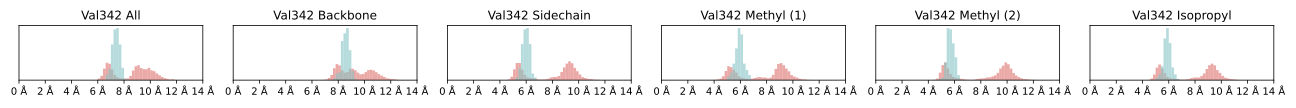

INDAZOLE2


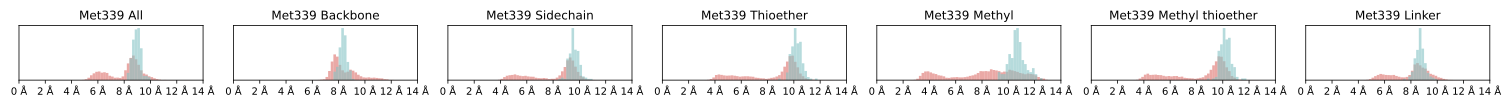

INDAZOLE2


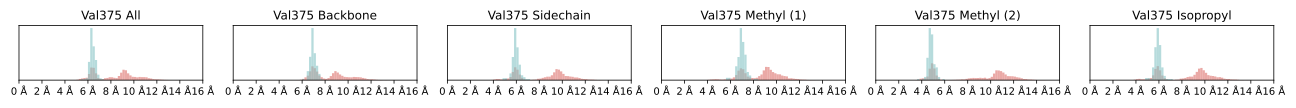

INDAZOLE1


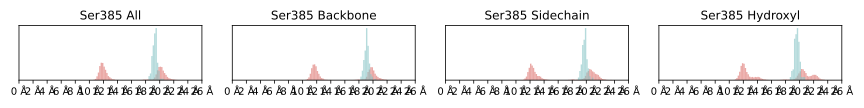

INDAZOLE1


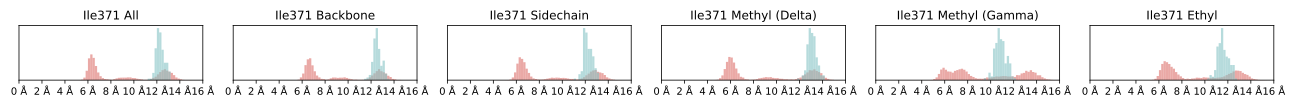

INDAZOLE1


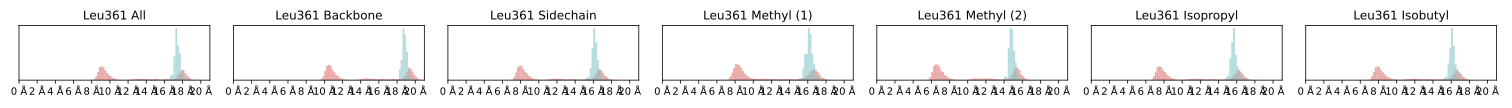

INDAZOLE1


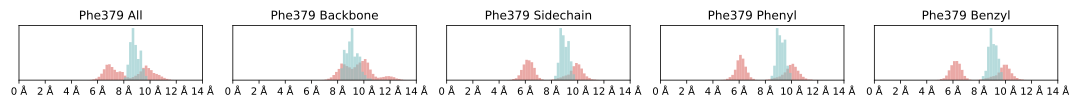

INDAZOLE1


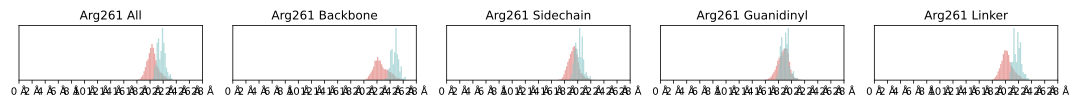

INDAZOLE1


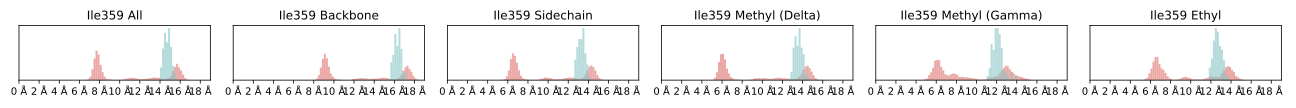

INDAZOLE1


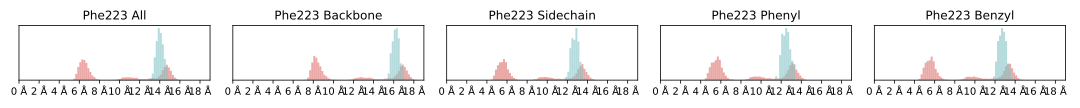

INDAZOLE1


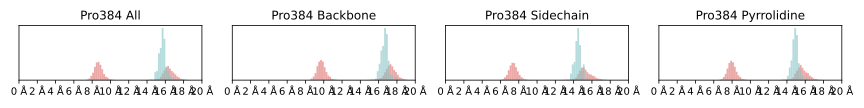

INDAZOLE1


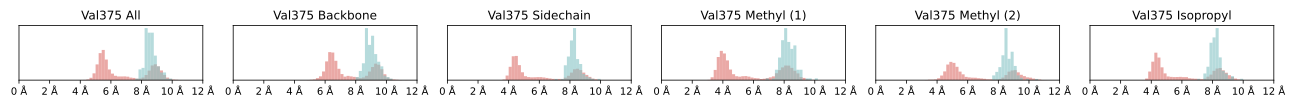

RUTHENIUM


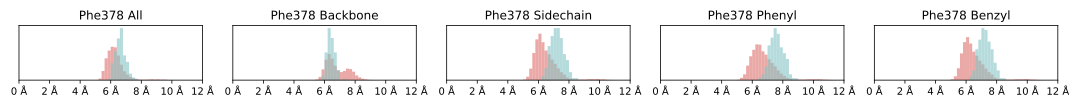

RUTHENIUM


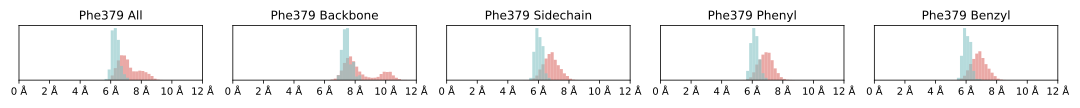

RUTHENIUM


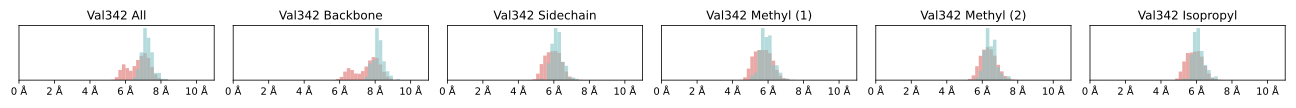

RUTHENIUM


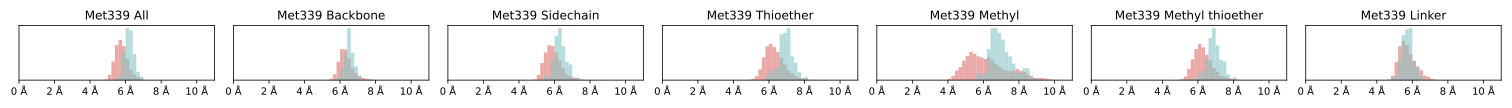

RUTHENIUM


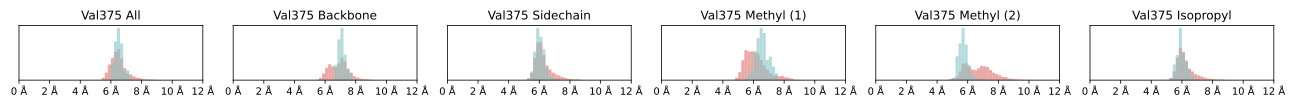

In [9]:
# Checking substructure distance distributions
svg_files = glob.glob(os.path.join(plotdir, '**/substructure_distances_*.svg'), recursive=True)
for file in svg_files:
    print(file.split('/')[-1].split('_')[2].upper())
    display(SVG(filename=file))

chlorines


100%|██████████| 149/149 [00:00<00:00, 356.31it/s]


ruthenium


100%|██████████| 149/149 [00:00<00:00, 197.60it/s]


indazole1


100%|██████████| 149/149 [00:00<00:00, 368.46it/s]


indazole2


100%|██████████| 149/149 [00:00<00:00, 404.36it/s]


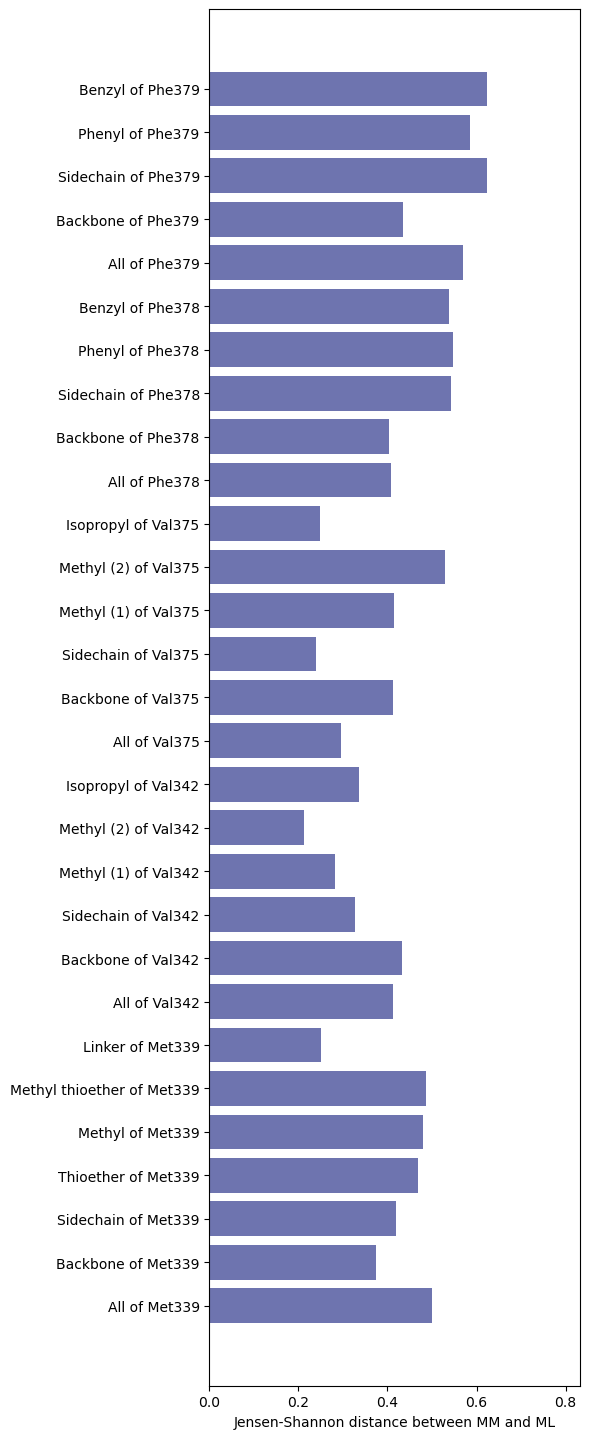

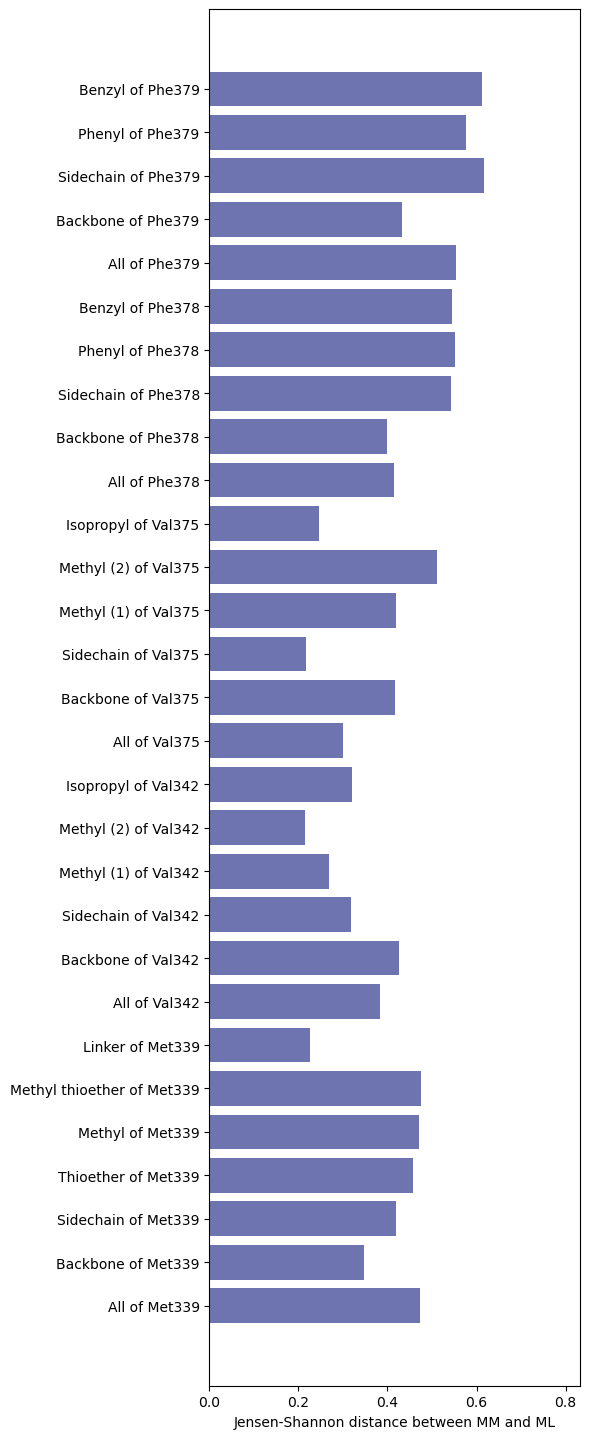

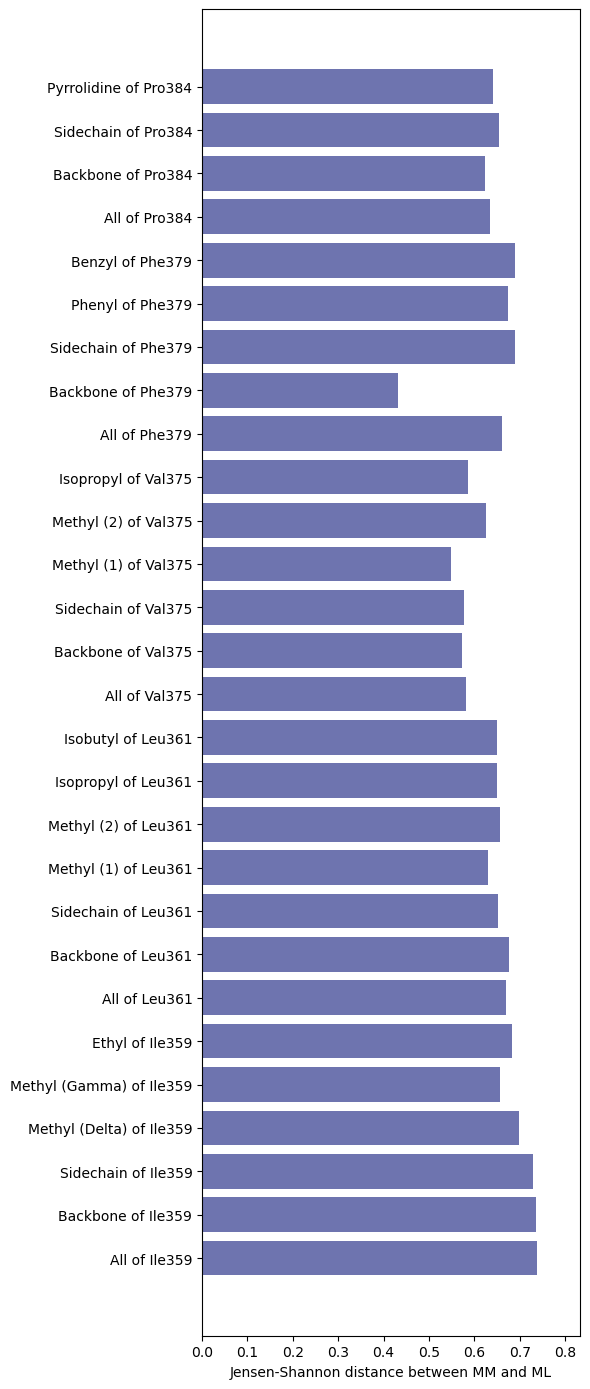

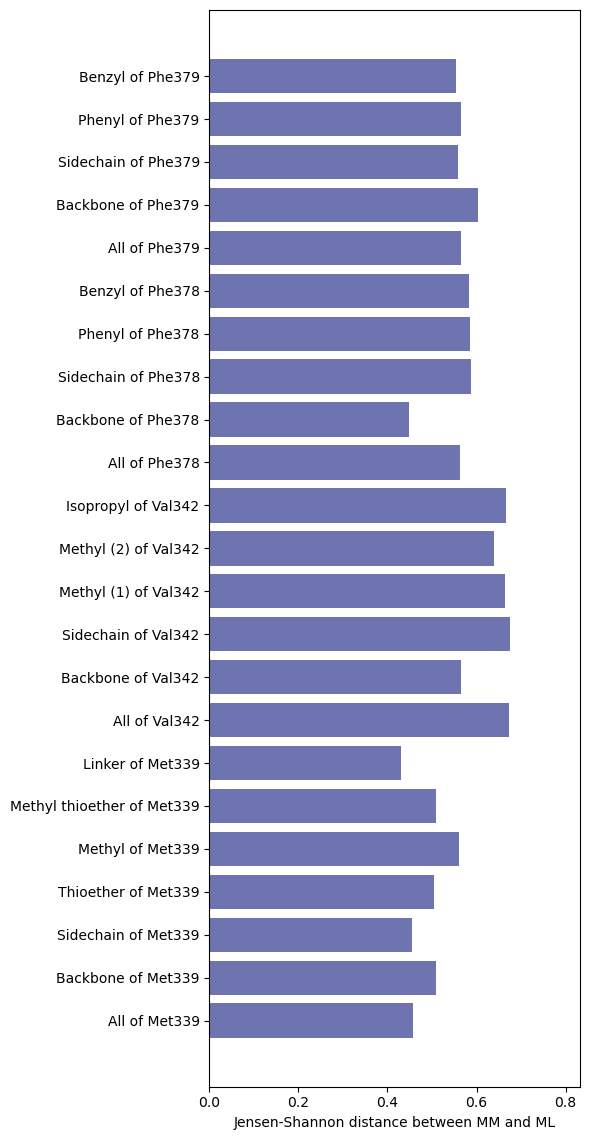

In [11]:
# Jensen-Shannon distance plots for candidate substructures

# Looping over all probes
for ligand_substructure in distance_probes:
    print(ligand_substructure)

    plot_residues_substructure_com_distance_divergence(
        mm_complex,
        ml_complex,
        "protein and resid " + ' '.join([res[3:] for res in distance_probes[ligand_substructure]['residues']]),
        distance_probes[ligand_substructure]['ligand_query'],
        save_to=os.path.join(distance_plotdir, 'ligand_'+ligand_substructure, f'jensen-shannon-distance_{ligand_substructure}.svg')
    )

### 3.3 Probe refinement

100%|██████████| 149/149 [00:00<00:00, 327.85it/s]


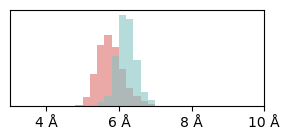

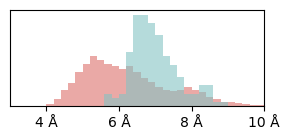

In [11]:
# Ruthenium - Met339 - Methyl
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 339",
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'met339', 'distance_ruthenium_met339.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 339" + " and " + residue_substructure_queries['MET']['Methyl'],
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'met339', 'distance_ruthenium_met339_methyl.svg')
)

100%|██████████| 149/149 [00:00<00:00, 318.70it/s]


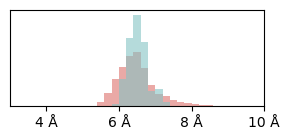

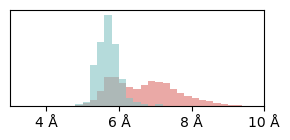

In [12]:
# Ruthenium - Val375 - Methyl (2)
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 375",
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'val375', 'distance_ruthenium_val375.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 375" + " and " + residue_substructure_queries['VAL']['Methyl (2)'],
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'val375', 'distance_ruthenium_val375_methyl2.svg')
)

100%|██████████| 149/149 [00:00<00:00, 236.37it/s]


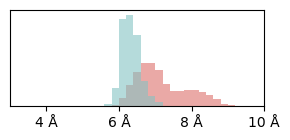

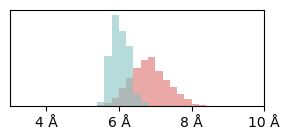

In [13]:
# Ruthenium - Phe379 - Sidechain
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 379",
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'phe379', 'distance_ruthenium_phe379.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 379" + " and " + residue_substructure_queries['PHE']['Sidechain'],
    distance_probes['ruthenium']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_ruthenium', 'phe379', 'distance_ruthenium_phe379_sidechain.svg')
)

100%|██████████| 149/149 [00:00<00:00, 336.92it/s]


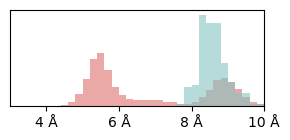

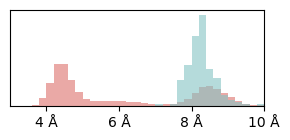

In [14]:
# Indazole #1 - Val375 - Sidechain
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 375",
    distance_probes['indazole1']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole1', 'val375', 'distance_indazole1_val375.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 375" + " and " + residue_substructure_queries['VAL']['Sidechain'],
    distance_probes['indazole1']['ligand_query'],
    xlims=(3,10),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole1', 'val375', 'distance_indazole1_val375_sidechain.svg')
)

100%|██████████| 149/149 [00:00<00:00, 304.88it/s]


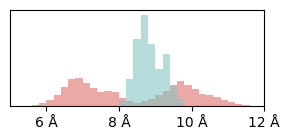

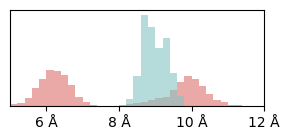

In [15]:
# Indazole #1 - Phe379 - Sidechain
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 379",
    distance_probes['indazole1']['ligand_query'],
    xlims=(5,12),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole1', 'phe379', 'distance_indazole1_phe379.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 379" + " and " + residue_substructure_queries['PHE']['Sidechain'],
    distance_probes['indazole1']['ligand_query'],
    xlims=(5,12),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole1', 'phe379', 'distance_indazole1_phe379_sidechain.svg')
)

100%|██████████| 149/149 [00:00<00:00, 300.51it/s]


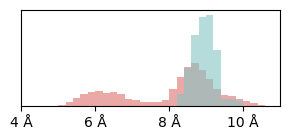

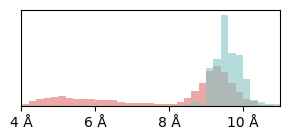

In [16]:
# Indazole #2 - Met339 - Sidechain
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 339",
    distance_probes['indazole2']['ligand_query'],
    xlims=(4,11),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole2', 'met339', 'distance_indazole2_met339.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 339" + " and " + residue_substructure_queries['MET']['Sidechain'],
    distance_probes['indazole2']['ligand_query'],
    xlims=(4,11),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole2', 'met339', 'distance_indazole2_met339_sidechain.svg')
)

100%|██████████| 149/149 [00:00<00:00, 280.04it/s]


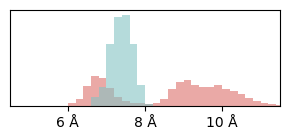

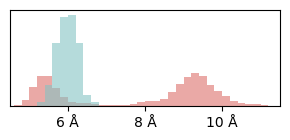

In [17]:
# Indazole #2 - Val342 - Sidechain
_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 342",
    distance_probes['indazole2']['ligand_query'],
    xlims=(4.5,11.5),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole2', 'val342', 'distance_indazole2_val342.svg')
)

_ = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 342" + " and " + residue_substructure_queries['VAL']['Sidechain'],
    distance_probes['indazole2']['ligand_query'],
    xlims=(4.5,11.5),
    save_to=os.path.join(distance_plotdir, 'ligand_indazole2', 'val342', 'distance_indazole2_val342_sidechain.svg')
)

## 4 Ligand-ligand distance distributions

Based mostly on the average distance analysis and structural reasonning, these candidates for ligand-ligand probes are proposed:

- Ruthenium ($Ru_{1}$) - Chlorides ($Cl_{2}$, $Cl_{3}$, $Cl_{4}$, $Cl_{6}$)
- Ruthenium ($Ru_{1}$) - Indazoles ($N_{8}$, $N_{23}$)

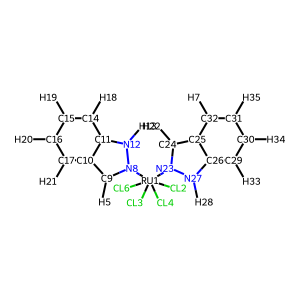

In [34]:
print_atom_names(mm_complex, 'resname NKP')

In [25]:
# Initalizing directory for distance probe plots
ligand_distance_plotdir = os.path.join(distance_plotdir, 'ligand-ligand')
os.makedirs(ligand_distance_plotdir, exist_ok=True)

100%|██████████| 149/149 [00:00<00:00, 313.86it/s]


{'mm_complex': array([2.3693459 , 2.38382046, 2.4079449 , ..., 2.35900402, 2.20719379,
        2.50960226]),
 'ml_complex': array([2.38238915, 2.28574004, 2.39334566, 2.33677191, 2.34957414,
        2.40655713, 2.41207216, 2.38169646, 2.33311362, 2.38065082,
        2.35456812, 2.39536997, 2.30714041, 2.46083211, 2.4067868 ,
        2.38480641, 2.32649802, 2.29185314, 2.4433989 , 2.34286139,
        2.32260865, 2.37796229, 2.37339479, 2.38172221, 2.40598892,
        2.50412173, 2.25434982, 2.38127801, 2.34558665, 2.34326397,
        2.36401947, 2.34454715, 2.29527644, 2.37170935, 2.35106146,
        2.46761239, 2.36452167, 2.45302141, 2.46730458, 2.4651342 ,
        2.32122698, 2.31218395, 2.269514  , 2.36736243, 2.31747889,
        2.39340846, 2.26605588, 2.44681428, 2.29573957, 2.35537719,
        2.33085898, 2.39461717, 2.28008924, 2.40489312, 2.30679289,
        2.46353394, 2.35129672, 2.43362215, 2.38044037, 2.47277654,
        2.46627487, 2.46322836, 2.3717682 , 2.36419375, 2.361

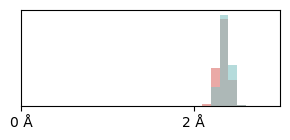

In [26]:
# Ruthenium - Chlorides
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    'resname NKP and name RU1',
    'resname NKP and name CL2 CL3 CL4 CL6',
    binsize=0.1,
    xlims=(0,3),
    save_to=os.path.join(ligand_distance_plotdir, 'distance_Ru_Cl.svg'))

plot_single_atom_distance_distributions(
    mm_complex,
    ml_complex,
    'resname NKP and name CL2 CL3 CL4 CL6',
    'resname NKP and name RU1',
    binsize=0.1,
    save_to=os.path.join(ligand_distance_plotdir, 'all_distances_Ru_Cl.svg'))

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 149/149 [00:00<00:00, 322.99it/s]


{'mm_complex': array([2.15907402, 2.12089857, 2.22914801, ..., 2.03179751, 2.27536778,
        2.17494804]),
 'ml_complex': array([2.05355534, 2.06615417, 2.03265542, 2.02894188, 1.99912111,
        1.98939626, 1.97436594, 1.94692387, 2.09830814, 1.99012369,
        1.97071434, 2.088518  , 2.11061948, 2.03012516, 2.02736399,
        1.96659523, 2.04873347, 2.08793896, 2.04314277, 2.07195143,
        2.07778457, 1.99774783, 2.11324215, 2.01060011, 1.93352416,
        2.10040143, 1.95481186, 2.05087663, 2.06924943, 2.02496847,
        1.96984728, 1.983786  , 2.03394228, 2.01410029, 2.10211819,
        2.25591008, 2.00252515, 2.00825829, 2.00250065, 1.97802677,
        2.04289304, 2.06903077, 2.08216211, 2.03386763, 2.02637428,
        2.03830943, 2.10717504, 2.12680731, 2.12270812, 2.00212003,
        2.05596647, 2.06463318, 2.01282981, 2.09133663, 2.02210129,
        1.95879814, 2.00025028, 2.09083947, 2.0335965 , 2.07140298,
        2.02466869, 2.01439622, 2.05080824, 2.13927582, 1.979

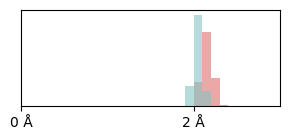

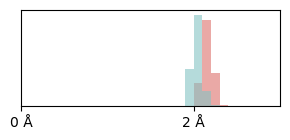

In [27]:
# Ruthenium - Indazole
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    'resname NKP and name N8',
    'resname NKP and name RU1',
    xlims=(0,3),
    binsize=0.1,
    save_to=os.path.join(ligand_distance_plotdir, 'distance_Ru_indazole1.svg'))

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    'resname NKP and name N23',
    'resname NKP and name RU1',
    xlims=(0,3),
    binsize=0.1,
    save_to=os.path.join(ligand_distance_plotdir, 'distance_Ru_indazole2.svg'))

## 5. Orientation distributions

In [4]:
# Initalizing directory for orientation probe plots
orientation_plotdir = os.path.join(plotdir, 'orientation_probes')
os.makedirs(orientation_plotdir, exist_ok=True)

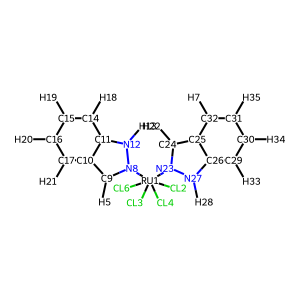

In [41]:
print_atom_names(mm_complex, 'resname NKP')

### 5.1 Ruthenium complex

100%|██████████| 149/149 [00:00<00:00, 317.45it/s]


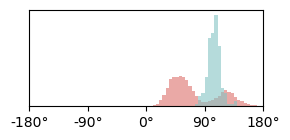

In [5]:
# Ruthenium-chloride plane - Phe223 phenyl plane
_ = plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 223 and name CD1 CD2 CZ',
    'resname NKP and name N8 CL2 N23'
)

100%|██████████| 149/149 [00:00<00:00, 274.90it/s]


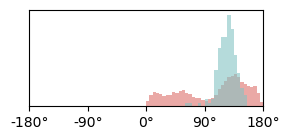

In [6]:
# Indazole #1 plane - Phe223 phenyl plane
_ = plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 223 and name CD1 CD2 CZ',
    'resname NKP and name N23 C25 C26'
)

100%|██████████| 149/149 [00:00<00:00, 299.80it/s]


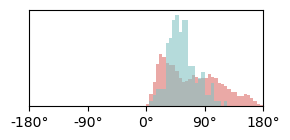

In [7]:
# Indazole #2 plane - Phe223 phenyl plane
_ = plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 223 and name CD1 CD2 CZ',
    'resname NKP and name N8 C10 C11'
)

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:00<00:00, 361.02it/s]


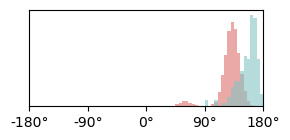

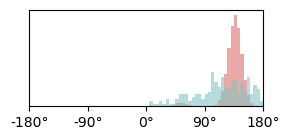

In [17]:
# Indazole #1 plane - Indazole #2 plane
ind1_ind2_planeangle_complex = plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'resname NKP and name N23 C25 C26',
    'resname NKP and name N8 C11 C10'
)
# Indazole #1 plane - Indazole #2 plane
ind1_ind2_planeangle_solvent = plot_plane_angle_distributions(
    mm_solvent,
    ml_solvent,
    'resname NKP and name N23 C25 C26',
    'resname NKP and name N8 C11 C10'
)

##### Manual plotting

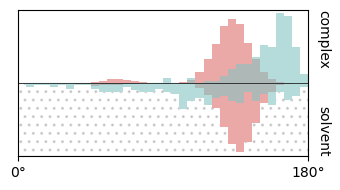

In [19]:
# Plot settings
binsize = 5
bins = np.linspace(0, 180, int(180 / binsize + 1))
bins_mid = (bins[1:] + bins[:-1]) / 2
alpha = 0.6

# Calculating densities
planeangles_mm_complex = ind1_ind2_planeangle_complex['mm_complex']
planeangles_ml_complex = ind1_ind2_planeangle_complex['ml_complex']
planeangles_mm_solvent = ind1_ind2_planeangle_solvent['mm_complex']
planeangles_ml_solvent = ind1_ind2_planeangle_solvent['ml_complex']

# Calculating densities
density_mm_complex = np.histogram(planeangles_mm_complex, bins=bins, density=True)[0]
density_mm_solvent = np.histogram(planeangles_mm_solvent, bins=bins, density=True)[0]
density_ml_complex = np.histogram(planeangles_ml_complex, bins=bins, density=True)[0]
density_ml_solvent = np.histogram(planeangles_ml_solvent, bins=bins, density=True)[0]

# Initializing figure
fig = plt.figure(figsize=(3.5, 2))
ax = plt.gca()

# Setting axis limits
plt.xlim(0, 180)
ymax = max([
    max(density_mm_complex),
    max(density_mm_solvent),
    max(density_ml_complex),
    max(density_ml_solvent)]
) * 1.05
plt.ylim(-ymax, ymax)

# Complex-solvent interface
plt.hlines(0, xmin=0, xmax=180,
            linewidth=0.5, color='black')
ax.add_patch(Rectangle((-180, 0), 360, -ymax,
                        fill=False, color='grey', hatch='..', alpha=0.3))
plt.text(185, ymax, "complex",
            rotation=-90, fontsize=10, va='top')
plt.text(185, -ymax, "solvent",
            rotation=-90, fontsize=10, va='bottom')

# Cover up patterned background patch up with full alpha white histograms
plt.bar(bins_mid, density_mm_complex,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, density_ml_complex,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, -density_mm_solvent,
        alpha=1, color='white', width=binsize)
plt.bar(bins_mid, -density_ml_solvent,
        alpha=1, color='white', width=binsize)

# Histograms; Complex on top, solvent on bottom; MM in red, ML in blue
plt.bar(bins_mid, density_mm_complex,
        alpha=alpha, color=palette['red'], width=binsize)
plt.bar(bins_mid, density_ml_complex,
        alpha=alpha, color=palette['mint'], width=binsize)
plt.bar(bins_mid, -density_mm_solvent,
        alpha=alpha, color=palette['red'], width=binsize)
plt.bar(bins_mid, -density_ml_solvent, alpha=alpha,
        color=palette['mint'], width=5)

# Formatting axes
ax.axes.get_xaxis().set_major_formatter(tck.FormatStrFormatter('%g°'))
ax.axes.get_xaxis().set_major_locator(tck.MultipleLocator(base=180))
ax.axes.get_yaxis().set_visible(False)

plt.tight_layout()

## 6. Representative structures

In [6]:
# Initializing directory for representative structures
structuredir = '../structures/3ldo'
os.makedirs(structuredir, exist_ok=True)

100%|██████████| 149/149 [00:00<00:00, 358.42it/s]


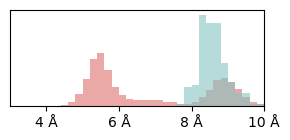

In [7]:
# Selecting representative distance probe
dist_indazole1_val375 = plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 375",
    distance_probes['indazole1']['ligand_query'],
    xlims=(3,10)
)

In [8]:
# Selecting representative frames based on a representative distance probe
save_representative_frame(mm_complex,
                          dist_indazole1_val375['mm_complex'],
                          5,
                          save_to=structuredir+'/dist_indazole1_val375_mm_1.pdb')
save_representative_frame(mm_complex,
                          dist_indazole1_val375['mm_complex'],
                          9,
                          save_to=structuredir+'/dist_indazole1_val375_mm_2.pdb')
save_representative_frame(ml_complex,
                          dist_indazole1_val375['ml_complex'],
                          8.5,
                          save_to=structuredir+'/dist_indazole1_val375_ml.pdb')

/Users/frederikespersenknudsen/opt/anaconda3/envs/q4b/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


ChimeraX commands to produce movies
```
# Navigating to directory
cd "[...]/mm_ml_analysis/structures/3ldo"

# Opening structures
open dist_indazole1_val375_mm_1.pdb
open dist_indazole1_val375_ml.pdb

# Colouring models accordingly
color #1 #dc706bff
color #2 #85c3c4
color byHetero

# Aligning by residues near ligand
match #1:339,342,375,379 to #2:339,342,375,379

# Hide solvent (Note that Ru and Cl will be interpreted as solvent)
hide solvent | ions | @CL*
show :NKP

# Starting labelling from scratch
hide protein atoms
transparency protein 70 cartoon

# Labelling all contacts slightly
contacts :NKP select true makePseudobonds false
select subtract solvent
select up
select subtract @H* | :NKP
show sel atoms
transparency sel 80 atoms
label sel & #1 font "Poppins" color "light gray"

# Labelling select contacts boldly
select :339,342,375,379 & protein & ~@H*
show sel atoms
transparency sel 0 atoms
label sel & #1 font "Poppins" color "black"

# Setting display settings
set bgColor white
lighting soft
view :NKP
select clear

# Set pivot point on ruthenium
cofr @RU1

# Make movies
# [Manually select an initial view to rotate from here]
movie record; turn y 2 180; wait 180; turn x 2 180; wait 180; movie encode yx-spin.mp4
```

Converting .MP4 to .GIF with `ffmpeg`
```
ffmpeg -i yx-spin.mp4 -vf "fps=30" yx-spin.gif
```

### 6.1 Conformational states

#### 6.1.1 Protein vs. ligand

In [5]:
# Calculate pairwise distances between protein and ligand
dists_mm = distance_time_series(mm_complex,
                                mm_complex.select_atoms("protein and backbone"),
                                mm_complex.select_atoms("resname NKP"))
dists_ml = distance_time_series(ml_complex,
                                ml_complex.select_atoms("protein and backbone"),
                                ml_complex.select_atoms("resname NKP"))
dists_mm = dists_mm.reshape((dists_mm.shape[0], dists_mm.shape[1]*dists_mm.shape[2]))
dists_ml = dists_ml.reshape((dists_ml.shape[0], dists_ml.shape[1]*dists_ml.shape[2]))

100%|██████████| 149/149 [00:00<00:00, 164.44it/s]


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dists_mm)
pca = PCA(n_components=2)
pca_mm = pca.fit_transform(scaled_data)
pca_ml = pca.transform(scaler.transform(dists_ml))

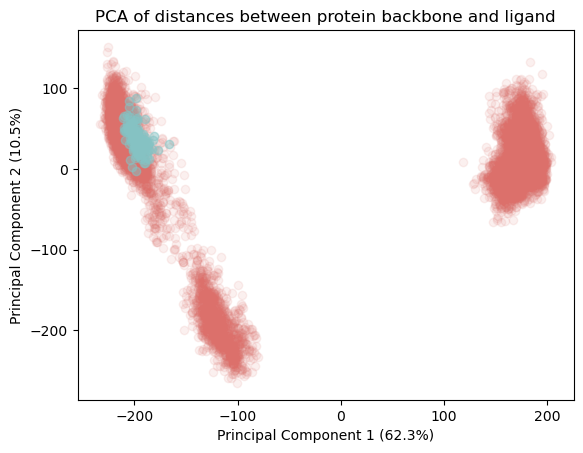

In [10]:
plt.scatter(pca_mm[:, 0], pca_mm[:, 1], alpha=0.1, c=palette['red'])
plt.scatter(pca_ml[:, 0], pca_ml[:, 1], alpha=0.5, c=palette['mint'])
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA of distances between protein backbone and ligand')
plt.show()

In [59]:
data = pd.DataFrame(np.concatenate([pca_mm, pca_ml]),
             columns=[f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})',
                      f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})'])
data['color'] = ['red']*pca_mm.shape[0]+['mint']*pca_ml.shape[0]

Text(0.5, 1.0, 'PCA of distances between protein backbone and ligand')

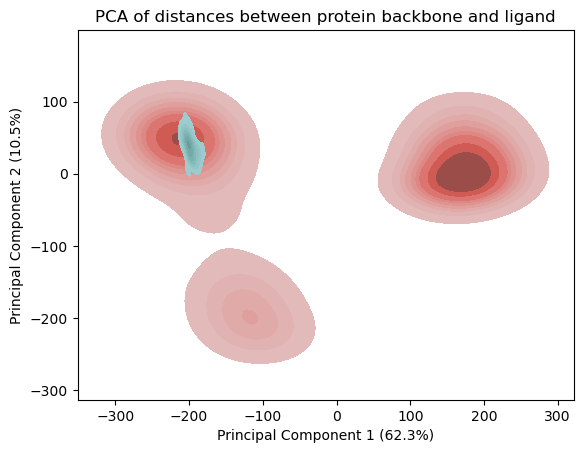

In [60]:
sns.kdeplot(data,
            x=f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})',
            y=f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})',
            hue="color",
            palette=palette, legend=False, fill=True).set_title('PCA of distances between protein backbone and ligand')

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_mm)

Text(0, 0.5, 'Custer index')

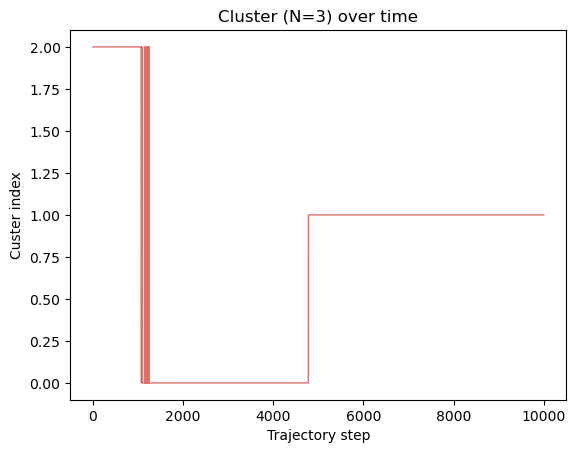

In [54]:
plt.plot(kmeans_clusters, color=palette['red'], linewidth=1)
plt.title("Cluster (N=3) over time")
plt.xlabel("Trajectory step")
plt.ylabel("Custer index")

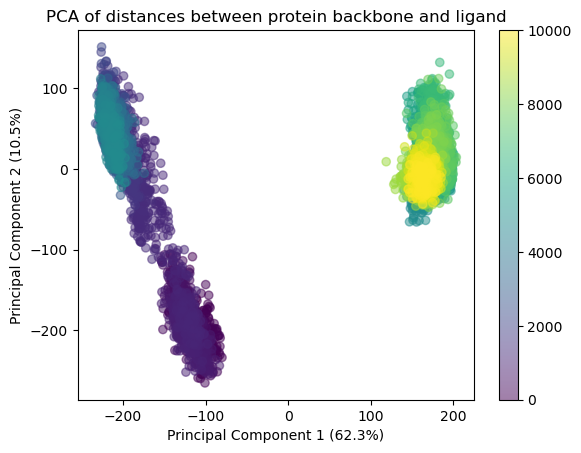

In [ ]:
plt.scatter(pca_mm[:, 0], pca_mm[:, 1], alpha=0.5, c=range(pca_mm.shape[0]), cmap='viridis')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA of distances between protein backbone and ligand')
plt.colorbar()
plt.show()